# **7 Fortune Group**
## Banking Marketing Targets Dataset
https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets

## Role

**Data scientist : Membantu team marketing dalam membuat model untuk menentukan targeted user.**

## Stages

Stage 0


1.  Problem Statement
2.  Goal
3.  Objective
4.  Business Metrics

Stage 1


1.   Data Exploration
2.   Exploratory Data Analysis
3.   Business Insights and Visualization

Stage 2


1.   Data Cleansing
2.   Featuring Engineering

Stage 3


1.   Modeling
2.   Evaluation









# **Stage 0**

## Problem Statement

Bank ABC adalah salah satu bank di Portugal yang ingin menawarkan produk deposito berjangka ke nasabahnya. Penawaran tersebut dilakukan secara langsung melalui telepon (telemarketing). Namun, karena cara tersebut membutuhkan banyak waktu dan biaya maka diperlukan identifikasi terlebih dahulu untuk menemukan user yang berpeluang tinggi membuka deposito berjangka sehingga proses telemarketing dapat dilakukan dengan efektif dan efisien.


## Goal

Meningkatkan conversion rate

## Objective

1. Membuat model untuk mendeteksi user-user yang berpotensi membuka rekening deposito berjangka agar user-user tersebut lebih diprioritaskan dalam melakukan telemarketing.
2. Memberikan rekomendasi bisnis dan rekomendasi nasabah yang berpotensi kepada pihak marketing


## Business Metrics

Conversion rate (pembukaan deposito berjangka)

# **Stage 1**

*Deadline 26 Sep - 2 Okt 2022*

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import matplotlib.ticker as mtick
from scipy.stats import uniform
import matplotlib.style as style

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import shap




from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

## Tentang Data

Projek ini menggunakan dua dataset, yaitu:

- train.csv: teridiri dari 45.211 baris dan 17 kolom diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010)
- test.csv: teridiri dari 4521 baris dan 17 kolom, dipilih secara acak dari train.csv

##  Deskripsi Kolom
**Data Klien Bank**
- age: usia (numerikal)
- job: jenis pekerjaan (kategorikal: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital: status pernikahan (kategorikal: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: tingkat pendidikan (kategorikal: primary, secondary, tertiary and unknown)
- default: memiliki kredit sebelumnya? (kategorikal: 'no','yes','unknown')
- housing: memiliki cicilan rumah? (kategorikal: 'no','yes','unknown')
- loan: memiliki pinjaman pribadi? (kategorikal: 'no','yes','unknown')
- balance: saldo individual.

## Terkait dengan kontak terakhir dari kampanye saat ini
- contact: jenis komunikasi ketika dihubungi (kategorikal: "unknown","telephone","cellular")
- day: hari atau tanggal terakhir dihubungi (numerikal)
- month: bulan terakhir dihubungi (kategorikal: "jan", "feb", "mar", …, "nov", "dec")
- duration: durasi kontak terakhir, dalam detik (numeric)

## Kolom lainnya
- campaign: jumlah kontak yang dilakukan selama kampanye ini dan untuk klien ini (numerikal)
- pdays: jumlah hari yang berlalu setelah klien terakhir dihubungi dari kampanye sebelumnya (numerikal, -1 berarti klien belum dihubungi sebelumnya)
- previous: jumlah kontak yang dilakukan sebelum kampanye ini dan untuk klien ini (numerikal)
- poutcome: hasil dari kampanye pemasaran sebelumnya (kategorikal: "unknown","other","failure","success")

## Variabel Ouput (target yang akan diprediksi):
- y: apakah klien berlangganan deposito berjangka? (biner: "yes","no")

## Load Dataset

In [2]:
## data train
df_train = pd.read_csv('train.csv',sep=';')

# URL_train ='https://drive.google.com/file/d/1l21D_27PqZYwf6WWUz671RytUhyAUNMp/view?usp=sharing'
# train = 'https://drive.google.com/uc?export=download&id='+URL_train.split('/')[-2]
# df_train = pd.read_csv(train,delimiter=';')

In [3]:
# # # duration_cut = []
# # # for x in df_train["duration"]:
# # #     if 120 <= x <=540 :
# # #         duration_cut.append("2-9")
# # #     else:
# # #         duration_cut.append("Lain")

# # # df_train['duration_cut'] = duration_cut


# camp_cut = []
# for x in df_train["campaign"]:
#     if 1 <= x <=3 :
#         camp_cut.append("1-3")
#     else:
#         camp_cut.append("Lain")

# df_train['camp_cut'] = camp_cut

# # age_cut = []
# # for x in df_train["age"]:
# #     if 25 <= x <= 40 :
# #         age_cut.append("25-40")
# #     else:
# #         age_cut.append("Lain")

# # df_train['age_cut'] = age_cut



In [3]:
# import statsmodels.stats.proportion as sp

# # df_yes=df_train[df_train['y']=='yes']
# # AB Testing
# df_train['y'] = df_train['y'].replace(['yes','no'],
#                                       [1,0])
# #---------

# # lain = df_train[df_train['duration_cut']=='Lain']
# # test = df_train[df_train['duration_cut']=='2-9']

# lain = df_train[df_train['camp_cut']=='Lain']
# test = df_train[df_train['camp_cut']=='1-3']

# # lain = df_train[df_train['age_cut']=='Lain']
# # test = df_train[df_train['age_cut']=='25-40']
# # -----------------------



# n_success_lain = lain['y'].sum()
# n_success_test = test['y'].sum()

# n_obs_lain = lain['y'].count()
# n_obs_test = test['y'].count()


# #------------------------

# success = np.array([n_success_lain,n_success_test])
# obs = np.array([n_obs_lain,n_obs_test])
# print(success)
# print(obs)

# #----------------------
# stats,pvalue = sp.proportions_ztest(success,obs)

# #---------------------
# print('AB Tetsing')
# print('P-Value : {0:0.4f}'.format(pvalue))
# if pvalue >= 0.05:
#     print('Insufficient to reject H0')
# else :
#     print('Sufficient to reject H0')
    
# #---------------tTest
# print('----'*25)
# ttest=st.ttest_ind(a=test['y'],b=lain['y'])
# tvalue= ttest.pvalue

# print('AB Tetsing')
# print('P-Value : {0:0.4f}'.format(tvalue))
# if tvalue >= 0.05:
#     print('Insufficient to reject H0')
# else :
#     print('Sufficient to reject H0')


In [3]:
df_train.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24155,47,technician,married,secondary,no,0,no,no,unknown,11,nov,74,1,-1,0,unknown,no
15705,40,admin.,single,tertiary,no,1005,yes,no,cellular,21,jul,449,1,-1,0,unknown,no
44953,38,admin.,married,secondary,no,5270,no,no,cellular,8,oct,163,1,91,12,other,no
30291,47,housemaid,divorced,secondary,no,1565,no,no,cellular,5,feb,253,1,-1,0,unknown,no
40164,34,technician,married,secondary,no,657,no,no,cellular,5,jun,263,2,-1,0,unknown,no


In [4]:
## data test
df_test = pd.read_csv('test.csv',sep=';')

# URL_test ='https://drive.google.com/file/d/1Bo1xL_EKtxEBDEnBgrlJK9UYLotLtioW/view?usp=sharing'
# test = 'https://drive.google.com/uc?export=download&id='+URL_test.split('/')[-2]
# df_test = pd.read_csv(test,delimiter=';')

In [5]:
df_test.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2239,42,blue-collar,married,secondary,no,0,yes,no,cellular,21,nov,328,6,-1,0,unknown,no
567,36,management,divorced,tertiary,no,3611,yes,no,unknown,4,jun,347,3,-1,0,unknown,no
60,41,blue-collar,married,primary,no,-516,no,yes,telephone,8,jul,554,3,-1,0,unknown,no
3173,33,technician,single,tertiary,no,137,no,no,cellular,25,aug,88,4,-1,0,unknown,no
3611,28,technician,single,secondary,no,389,yes,no,cellular,11,may,15,7,-1,0,unknown,no


In [6]:
# dataset size
print('Train data size: ', df_train.shape)
print('Test data size: ', df_test.shape)

Train data size:  (45211, 17)
Test data size:  (4521, 17)


## Exploratory Data Analysis

## Statistics Descriptive

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#Jumlah Missing Value
df_train.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
df_train.duplicated().any()

False

In [11]:
df_train['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [16]:
#Pemisahan data Yes Dan NO
df_yes=df_train[df_train['y']=='yes']
df_no=df_train[df_train['y']=='no']

In [13]:
#Pemisahan Kolom Berdasarakn Typedata (Numerik & Kategori)
nums=['age','balance','day','duration','campaign','pdays','previous']
cats=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

Catatan : 
1. semua Typedata sesuai
2. Tidak di temukan Missing value/ Data kosong di setiap kolom
3. Tidak di temukan Data Duplikat
4. terdapat imbalance data user yang membuka deposito dan tidak membuka deposito

In [14]:
df_train[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


Catatan : 
1. kolom age,day memiliki sedikit persebaran data berbeda dengan kolom balance dan pdays yang memiliki pesebaran data yang besar dan cukup ekstrim
2. perbedaan yang cukup signifikan antara mean/median dengan max mengidikasikan outlier yang juga signifikan 

In [15]:
df_train[nums].mode()

,age,balance,day,duration,campaign,pdays,previous
0,32,0,20,124,1,-1,0


dari informasi di atas diperoleh bahwa:
1. usia client yang paling banyak ditemukan adalah client dengan usia 32 tahun
2. balance yang palinga banyak ditemukan adalah 0 euro.
3. day atau tanggal paling banyak adalah 20
4. duration yang paling banyak dilakukan adalah 124 detik.
5. jumlah campaign yang sering(muncul) dilakukan untuk client adalah sebanyak 1 kali.
6. dari nilai pdays, yang paling banyak adalah -1 (client belum dihubungi sebelumnya).
7. nilai previous yang menandakan jumlah kontak yang dilakukan sebelum kampanye dilakukan terbanyak adalah 0


In [16]:
df_train[cats].describe().transpose()

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


diperoleh bahwa:
1. Ada 12 pekerjaan, blue-collar adalah pekerjaan terbanyak
2. client dengan status sudah menikah merupakan client yang terbanyak
3. kebanyakan pendidikan client dari data adalah secondary
4. default no merupakan data dari default yang kebanyakan ditemukan pada client
5. kebanyakan client mempunyai rumah
6. client dengan tidak adanya pinjaman merupakan client yang terbanyak.
7. client sering dihubungi melalui cellular
8. data month yang paling banyak adalah may
9. poutcome yang paling banyak ditemukan adalah unknown
10. nilai dari y yang paling sering muncul adalah no yang menandakan bahwa client kebanyakan tidak menjadi nasabah deposito



In [17]:
for col in nums:
    print(f'''Data Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Data Value count kolom age:
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

Data Value count kolom balance:
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: balance, Length: 7168, dtype: int64

Data Value count kolom day:
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

Data Value count kolom duration:
124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: duration,

In [18]:
for col in cats:
    print(f'''Data Value count kolom {col}:''')
    print(df_train[col].value_counts())
    print()

Data Value count kolom job:
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Data Value count kolom marital:
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

Data Value count kolom education:
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

Data Value count kolom default:
no     44396
yes      815
Name: default, dtype: int64

Data Value count kolom housing:
yes    25130
no     20081
Name: housing, dtype: int64

Data Value count kolom loan:
no     37967
yes     7244
Name: loan, dtype: int64

Data Value count kolom contact:
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

Data Value count kolom month:
may    13766
jul     689


Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil
observasinya, seperti:  
A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?  
B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?  
C. Apakah ada kolom yang memiliki nilai summary agak aneh?  
(min/mean/median/max/unique/top/freq)

### Jawaban
A. Semua tipe data sudah sesuai  
B. Tidak ada kolom yang memiliki nilai kosong  
C. Terdapat kolom yang agak aneh karena memiliki nilai standard deviasi yang sangat tinggi yaitu pada kolom 'balance'

## Univariate Analysis

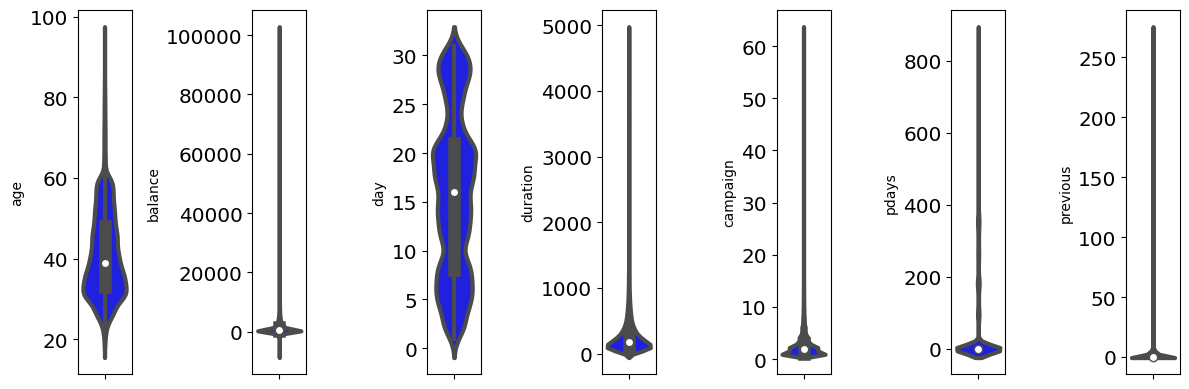

In [22]:
# Univariate analysis terhadap kolom numerikal menggunakan boxplot
for i in range(0, len(nums)):
  plt.subplot(1,len(nums),i+1)
  sns.violinplot(y=df_train[nums[i]], color='blue', orient='v')
  plt.tight_layout();

diperoleh bahwa:
1. Pada kelompok numerikal, hampir semua kolom memiliki banyak outlier.
2. Pada kolom age tidak terlalu bermasalah karena hanya sebagian kecil saja yang menjadi outlier.
3. Pada kolom balance, duration, campaign didominasi oleh nilai yang kecil. Variasi data yang banyak pada nilai tinggi membuat oulier menjadi semakin banyak.
4. Pada kolom day tidak ada masalah.
5. Pada kolom pdays memiliki nilai -1 (belum dihubungi sebelumnya) yang mendominasi yaitu 36954 dari 45211 baris atau sekitar 81% data sehingga kotak menjadi berpusat pada nilai -1 sehingga nilai-nilai diatas -1 menjadi oulier yang cukup banyak sekitar 19%.
6. Pada kolom previous memiliki 0 yang mendominasi yang sesuai dengan nilai -1 pada kolom pdays karena nilai ini memiliki korelasi yang kuat. Sehingga selain dari nilai 0 akan menjadi outlier. Namun ada satu nilai yang benar-benar sangat jauh yaitu 275 (outlier ini dapat dihapus karena hanya satu saja dan jaraknya sangat jauh)
7. Yang perlu di follow up saat data pre-processing dapat melakukan standarisasi ataupun normalisasi. Solusi lainnya menggunakan sebagian besar data saja (misalnya 90% data)

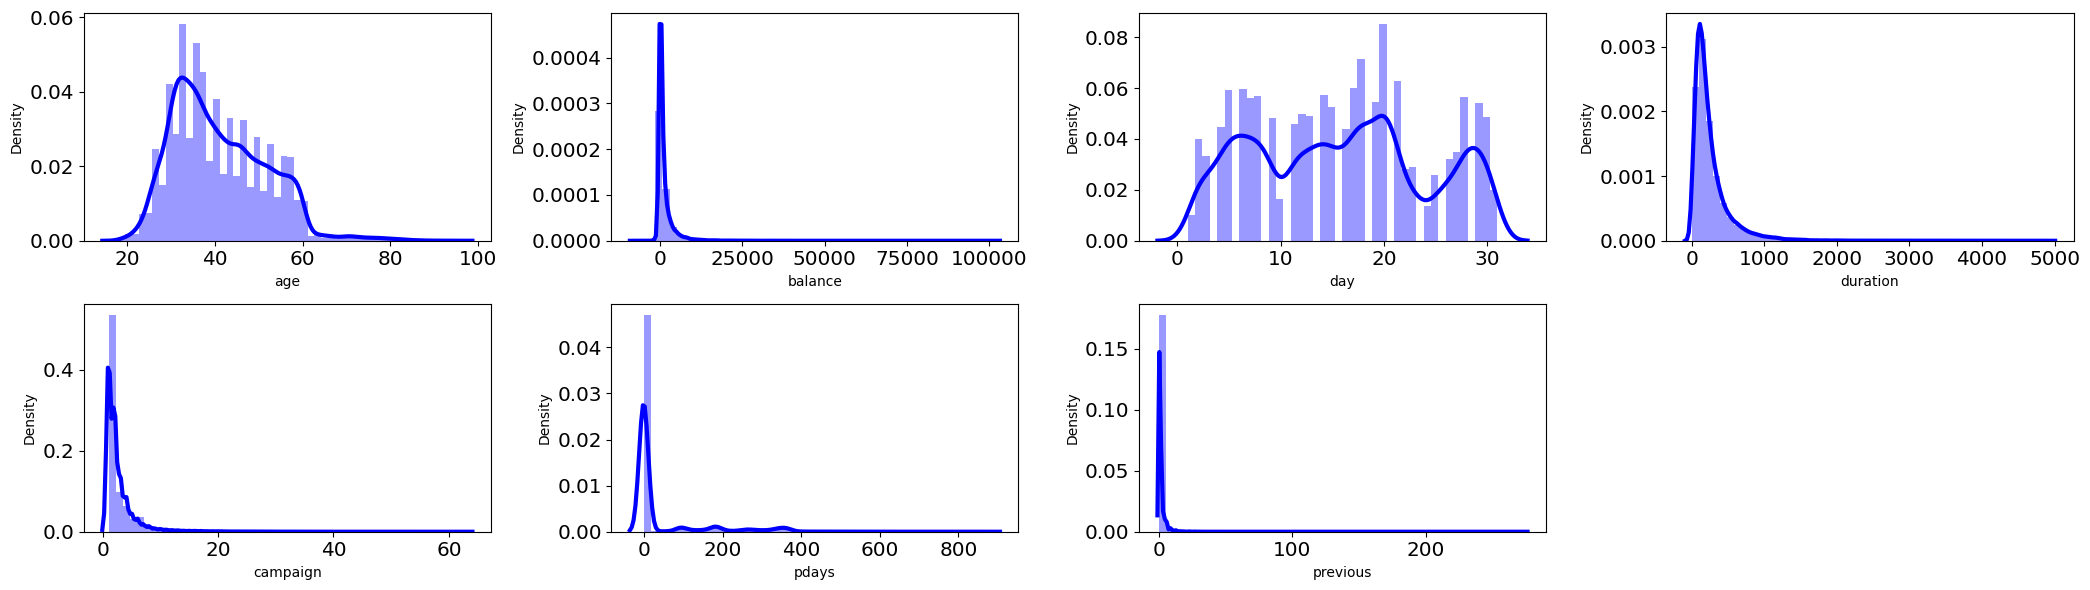

In [23]:
# # Univariate analysis terhadap kolom numerikal menggunakan distplot
plt.figure(figsize=(21, 6))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1) 
    sns.distplot(df_train[nums[i]], color='blue');
    plt.tight_layout()

In [24]:
#skewness value
for i in range(0, len(nums)):
    print(f"Skewness {df_train[nums].columns[i]} : {df_train[nums[i]].skew()}")

Skewness age : 0.6848179257252598
Skewness balance : 8.360308326166326
Skewness day : 0.09307901402122411
Skewness duration : 3.144318099423456
Skewness campaign : 4.898650166179674
Skewness pdays : 2.6157154736563477
Skewness previous : 41.84645447266292


Catatan :
1. Dari nilai skewness dan visualisasi di atas dapat dikatakan bahwa tipe data numerikal memiliki pola persebaran datanya adalah skew postif dimana nilai mean lebih besar dari pada median atau data mengalami penumpukan di angka kecil, kecuali data day yang hampir menyerupai distribusi biomonial.

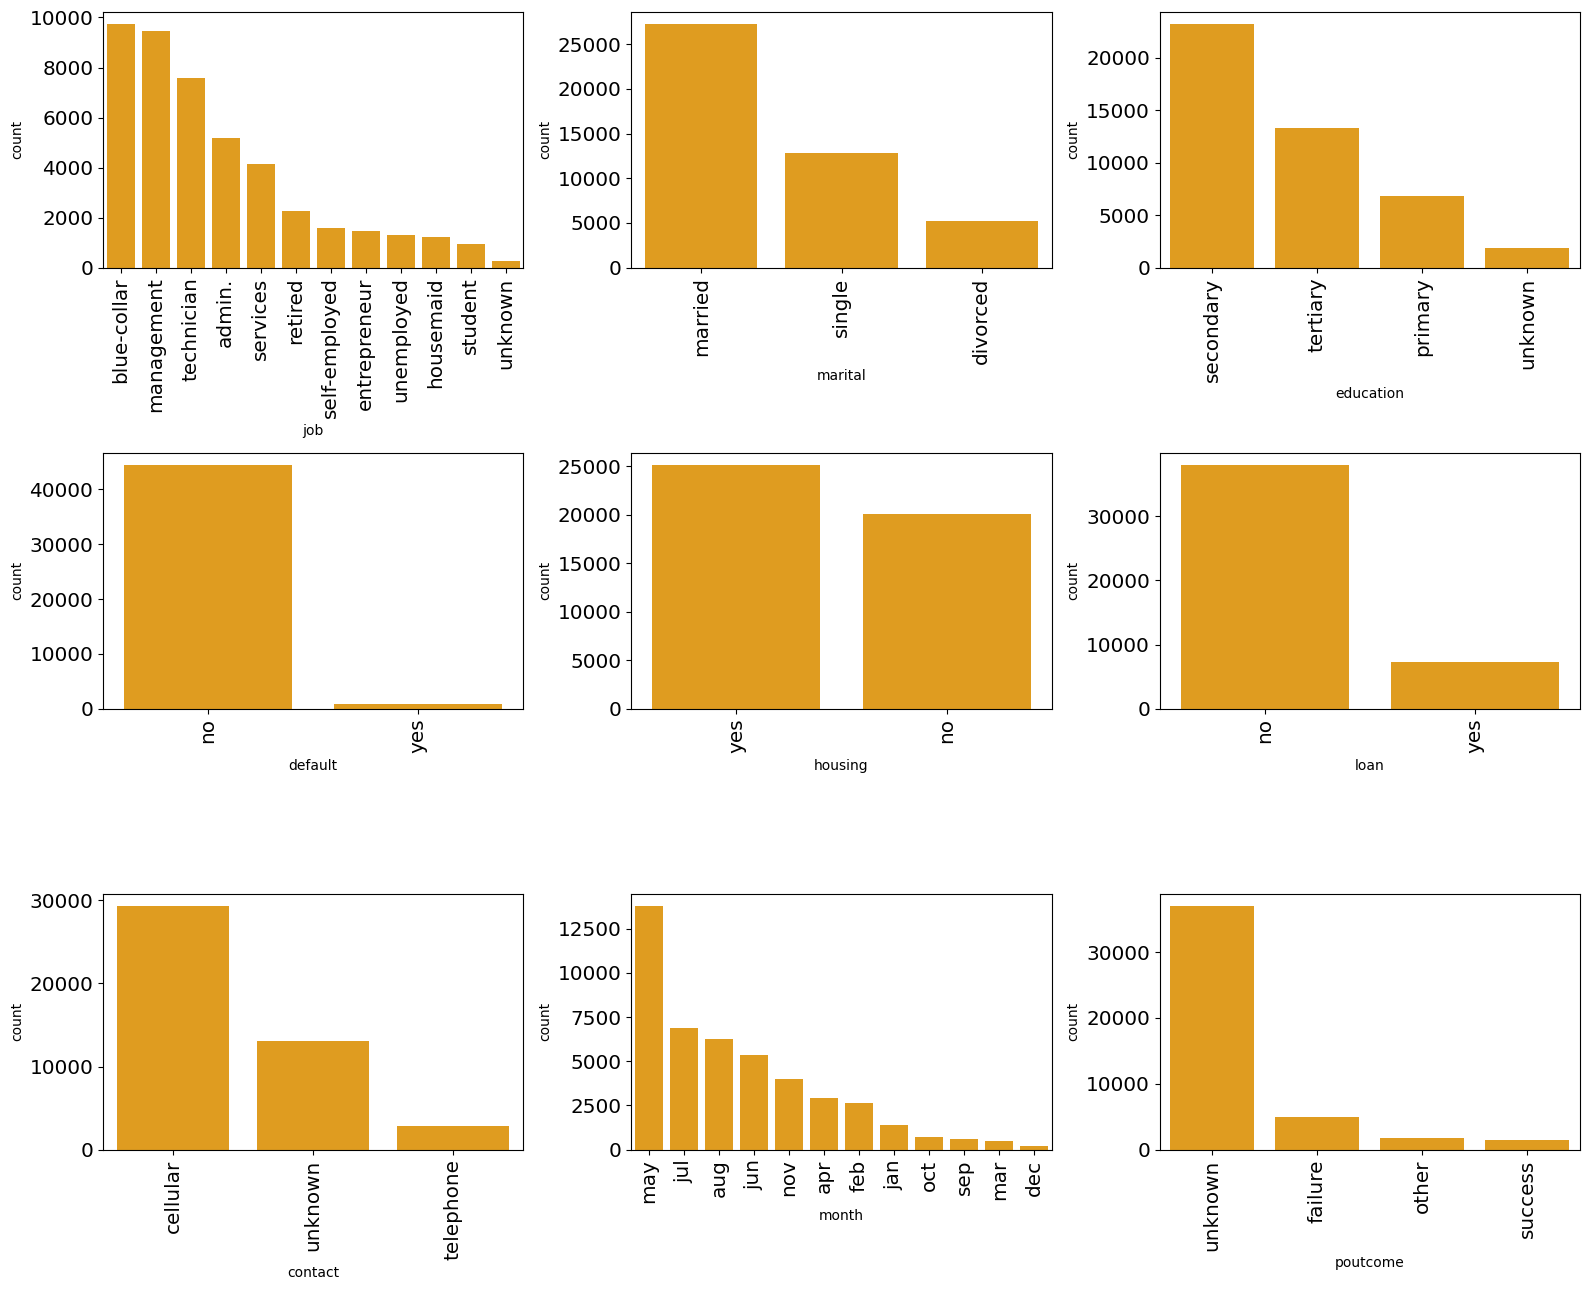

In [27]:
plt.figure(figsize=(16, 13))
for i in range(0, len(cats)-1):
    df=df_train[cats[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(df_train[cats[i]],color='orange', orient='h',order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()


dari barplot diatas diperoleh bahwa dari keseluruhan data kategorik: 
1. klien yang terbanyak berprofesi sebagai management
2. klien dengan status sudah menikah merupakan klien yang terbanyak
3. pendidikan secondary merupakan yang paling banyak
4. default no lebih banyak dibandingkan yes
5. klient yang memiliki rumah lebih banyak daripada yang tidak memiliki rumah
6. klien dengan status tidak ada pinjaman lebih banyak dibandingkan yang memiliki pinjaman
7. klien lebih banyak dihubungi melalui cellular daripada telephone dan unknown
8. bulan may merupakan bulan yang paling banyak dilakukan campaign
9. hasil dari kampanye pemasaran sebelumnya yang paling banyak adalah unknown


## Multivariate Analysis

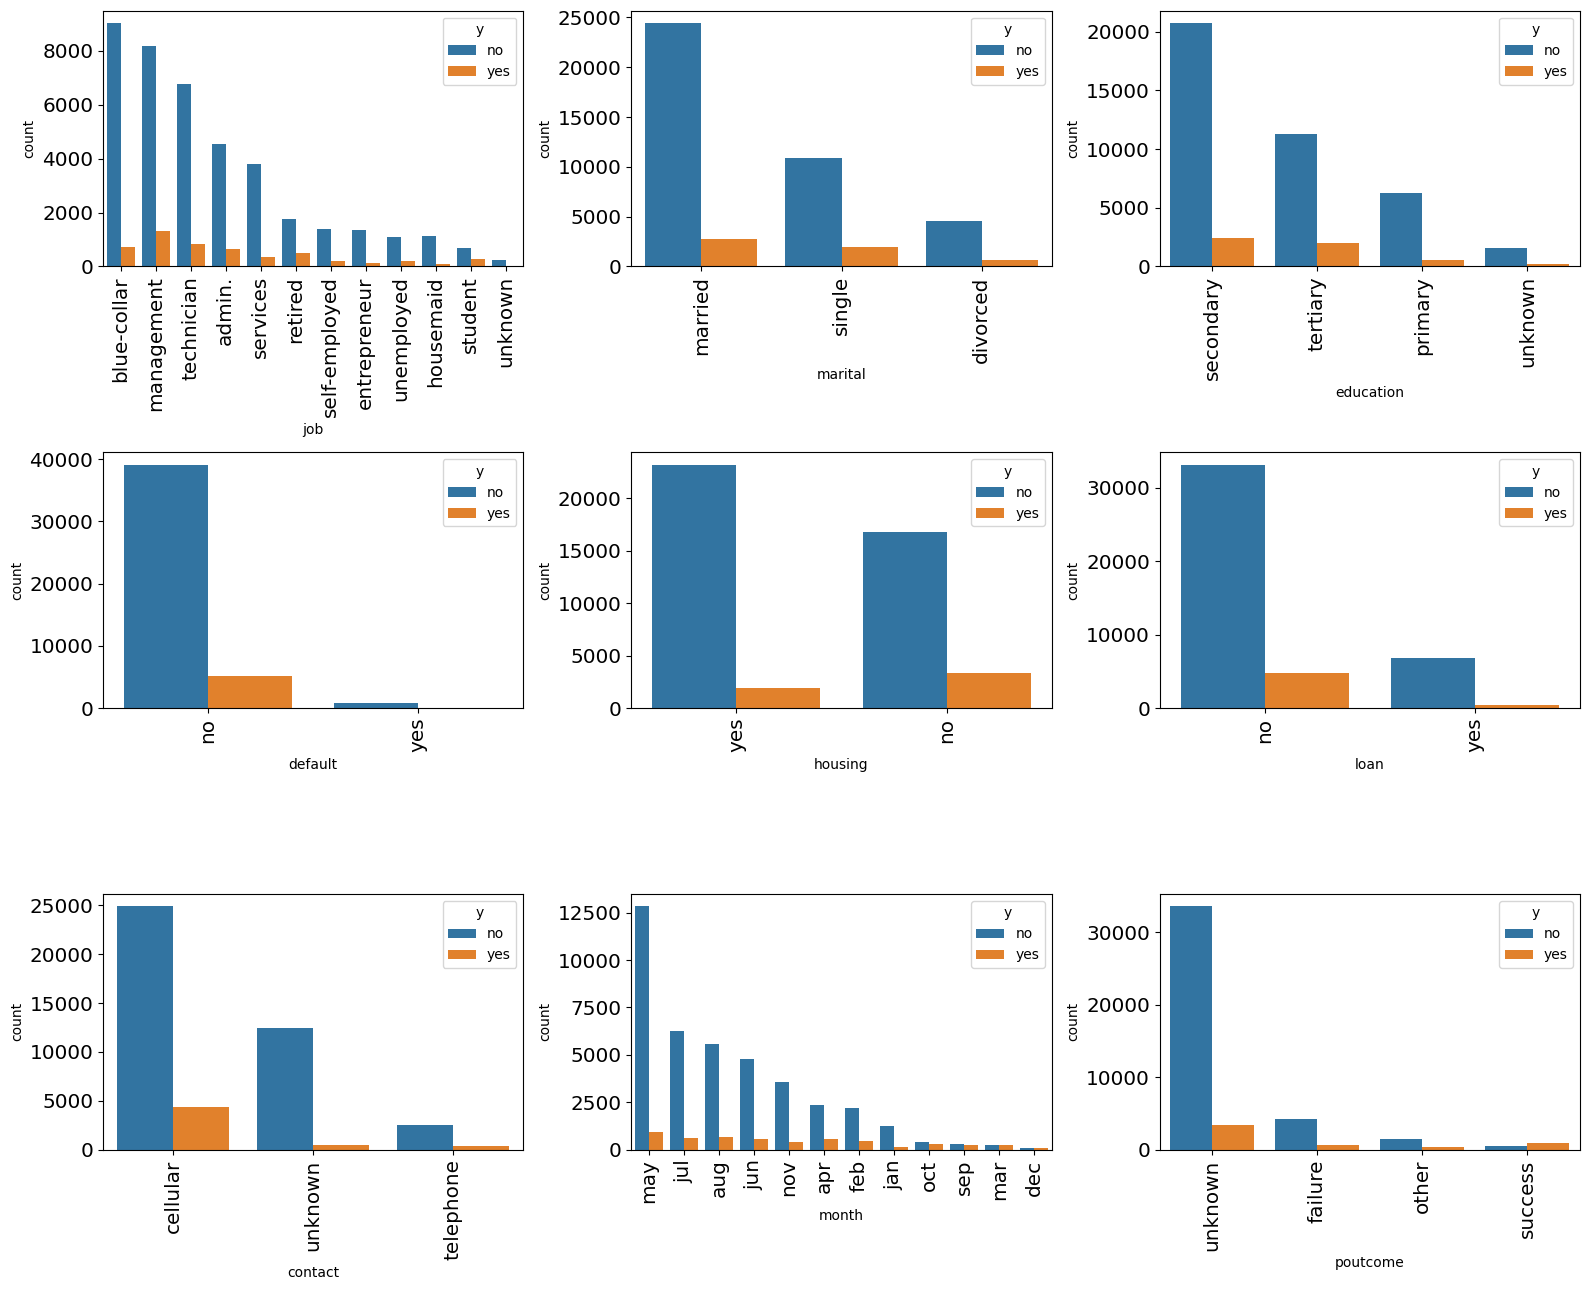

In [28]:
plt.figure(figsize=(16, 13))
for i in range(0, len(cats)-1):
    df=df_train[cats[i]].value_counts().index
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df_train[cats[i]],hue=df_train['y'], orient='h',order=df)
    plt.xticks(rotation=90)
    plt.tight_layout()

In [29]:

for col in cats:
    print(f"\033[1m{col} \n{20 * '-'}\033[0m")
    print(df_train[col].value_counts(), '\n')

job 
--------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

marital 
--------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

education 
--------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

default 
--------------------
no     44396
yes      815
Name: default, dtype: int64 

housing 
--------------------
yes    25130
no     20081
Name: housing, dtype: int64 

loan 
--------------------
no     37967
yes     7244
Name: loan, dtype: int64 

contact 
--------------------
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

month 
--------------------
may    13766
jul     6895
aug    

**Grafik Job**  
Pekerjaan 'blue-collar' memiliki jumlah nasabah yang tidak berlangganan paling tinggi sedangkan pekerjaan 'management' memiliki jumlah nasabah yang berlangganan paling tinggi. Untuk rasio tertinggi antara nasabah yang berlangganan dan tidak, ada pada pekerjaan 'student'. Namun, secara keseluruhan nasabah yang tidak berlangganan selalu lebih tinggi dibandingkan nasabah yang berlangganan.

**Grafik Marital**  
Status 'marital' memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi kemudian status 'single' dan 'divorced'

**Grafik Education**  
Pendidikan 'secondary' memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi.

**Grafik Default**  
Nasabah yang belum memiliki kredit sebelumnya memiliki jumlah nasabah yang berlangganan dan tidak berlangganan tertinggi dibandingkan nasabah yang sudah memiliki kredit sebelumnya.

**Grafik Housing**  
Nasabah yang tidak memiliki cicilan rumah lebih banyak yang berlangganan dibandingkan nasabah yang memiliki cicilan rumah.

**Grafik Loan**  
Nasabah yang tidak memiliki pinjaman pribadi lebih banyak yang berlangganan dibandingkan nasabah yang memiliki pinjaman pribadi.

**Grafik Contact**  
Nasabah yang dihubungi menggunakan jenis komunikasi 'cellular' memiliki jumlah nasabah yang berlangganan paling banyak dibandingkan jenis komunikasi lain.

**Grafik Month**  
Bulan May memiliki nasabah yang berlangganan dan tidak paling tinggi dibandingkan bulan lainnya.

**Grafik Poutcome**  
Yang mengalami keberhasilan dari kampanye sebelumnya memiliki rasio pembukaan deposito tertinggi.

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang
diajarkan di kelas). Tuliskan hasil observasinya, seperti:  
A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana
saja yang paling relevan dan harus dipertahankan?  
B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu
dilakukan terhadap feature itu?  
* Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

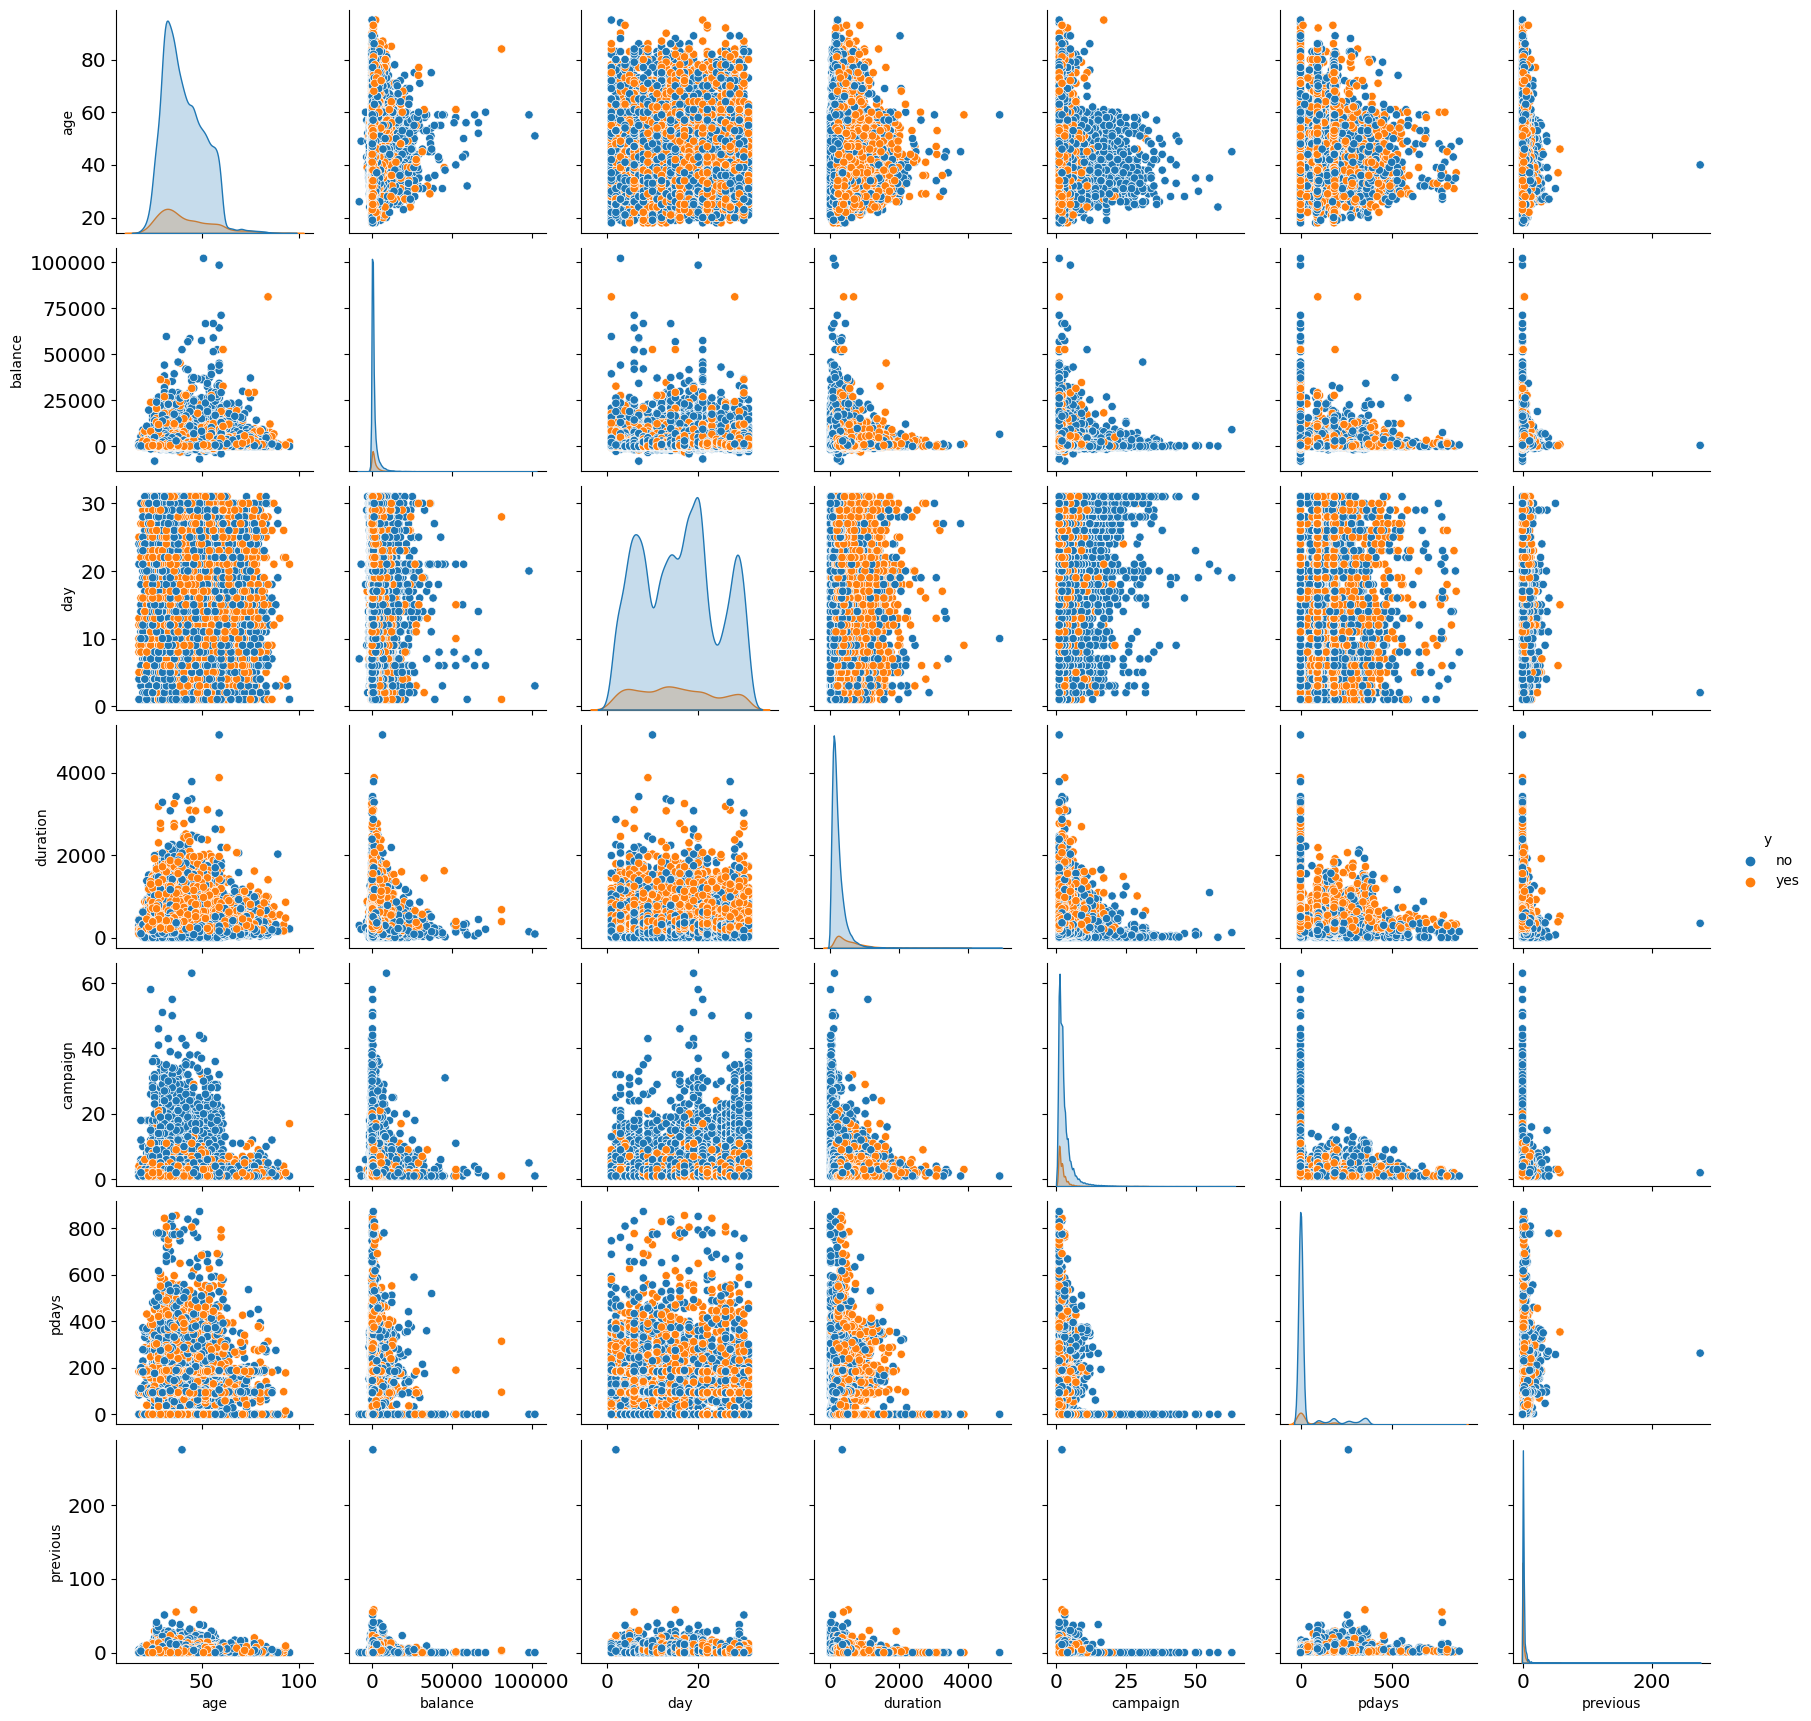

In [30]:
# Multivariate analysis terhadap kolom numerikal menggunakan pairplot
p=sns.pairplot(df_train,hue='y')

A. Korelasi antar feature dan label lemah. Namun, semua feature dapat dimanfaatkan untuk melakukan analisis kecuali feature 'month' dan 'pdays'.



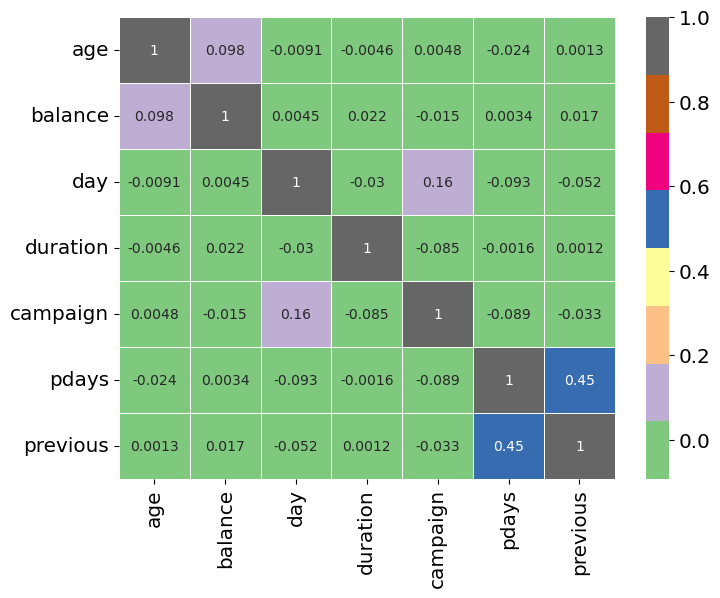

In [31]:
# Multivariate analysis terhadap kolom numerikal menggunakan Heatmap Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df_train.corr(),annot=True,cmap='Accent',linewidths=0.5);

B. Korelasi antar feature kebanyakan lemah kecuali pada korelasi antara feature 'previous' dan 'pdays' yang cukup kuat dengan nilai 0.45. Semua feature dapat dimanfaatkan untuk melakukan analisis. 

## Bussiness Insights and Visualization

In [23]:
def test(x):
    df_pro1 = df_train.groupby([x, 'y']).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'unique_customer'})
    df_pro2 = df_train.groupby([x]).agg({'pdays':'count'}).reset_index().rename(columns={'pdays':'total_customer'})

    df_pro = df_pro1.merge(df_pro2, how = 'inner', on=x)
    df_pro['percentage'] = round(df_pro['unique_customer'] / df_pro['total_customer'] * 100, 2)
    
    
    df_pro_pivot = df_pro.pivot_table(values=['unique_customer', 'percentage'], columns='y', index=x).reset_index()
    df_pro_pivot.columns = [x, 'no_perc', 'yes_perc', 'no_count', 'yes_count']
    df_pro_pivot = df_pro_pivot.fillna(0)
    df_pro_pivot['total_count'] = df_pro_pivot['no_count'] + df_pro_pivot['yes_count']
    return df_pro_pivot[[x, 'yes_count', 'no_count', 'yes_perc', 'no_perc', 'total_count']]

In [24]:
age_ratio = test('age')
age_ratio.total_count.sum()

45211.0

In [25]:
(age_ratio['yes_count'] + age_ratio['no_count']).sum()

45211.0

In [26]:
age_ratio

,age,yes_count,no_count,yes_perc,no_perc,total_count
0,18,7.0,5.0,58.33,41.67,12.0
1,19,11.0,24.0,31.43,68.57,35.0
2,20,15.0,35.0,30.00,70.00,50.0
3,21,22.0,57.0,27.85,72.15,79.0
4,22,40.0,89.0,31.01,68.99,129.0
...,...,...,...,...,...,...
72,90,2.0,0.0,100.00,0.00,2.0
73,92,2.0,0.0,100.00,0.00,2.0
74,93,2.0,0.0,100.00,0.00,2.0
75,94,0.0,1.0,0.00,100.00,1.0


In [33]:
def rasio(cat, yaxis_height=100, bar_color='cadetblue'):
    #Membuat visualisasi bar chart dan pie chart.
    style.use('seaborn')
    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    fig, ax1 = plt.subplots() #Inisiasi subplot 1 row 2 columns

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Inisiasi figure size
    fig.set_figheight(8)
    fig.set_figwidth(15)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('white')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, yaxis_height])
    plt.yticks(fontsize=13)

In [36]:
def ratio_count(cat, percent_height=100, bar_color='cadetblue', fig_row=1, fig_col=1, h_space=0.5):
    #Membuat visualisasi
    style.use('seaborn')

    fig, (ax1, ax2) = plt.subplots(fig_row, fig_col) #Inisiasi subplot 1 row 2 columns
    ## Inisiasi figure size
    fig.set_figheight(15)
    fig.set_figwidth(20)

    ##Mengurutkan data frame `df3_group_pivot` berdasarkan nilai churn secara descending.
    df_pro_pivot = test(cat)
    df_pro_pivot2 = df_pro_pivot.sort_values('yes_perc', ascending=False)

    ##Inisiasi variabel pendukung
    labels = list(df_pro_pivot2[cat])
    yes = df_pro_pivot2['yes_perc'].tolist()
    no = df_pro_pivot2['no_perc'].tolist()
    x = np.arange(len(labels)) # lokasi label
    width = 0.7 # lebar bar

    ##Membuat visualisasi barplot
    rects1 = ax1.bar(x, yes, width, label='Yes', color=bar_color)

    ## Menambahkan labels, title dan custom x-axis tick labels, dan sebagainya.
    ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax1.set_facecolor('whitesmoke')
    ax1.set_ylabel('Ratio (%)',fontsize=13)
    ax1.set_xticks(x)
    ax1.set_xticklabels(labels, fontsize=13)
    ax1.bar_label(rects1, padding=10, fontsize=13, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax1.set_ylim([0, percent_height])
    ax1.set_xlabel(cat)
    # ax1.set_title('Rasio Pembukaan Akun Deposito berdasarkan Jenis Pekerjaan Nasabah')

    #Visualisasi Countplot
    df_pro_pivot3 = test(cat)
    df_pro_pivot4 = df_pro_pivot.sort_values('total_count', ascending=False)

    ##Inisiasi variabel pendukung
    labels2 = list(df_pro_pivot2[cat])
    yes2 = df_pro_pivot2['yes_count'].tolist()
    no2 = df_pro_pivot2['no_count'].tolist()
    x2 = np.arange(len(labels)) # lokasi label
    width2 = 0.4 # lebar bar

    ##Membuat visualisasi barplot
    rects3 = ax2.bar(x - width2/2, yes2, width2, label='Yes', color='cadetblue')
    rects4 = ax2.bar(x + width2/2, no2, width2, label='No', color='darkseagreen')

    ax2.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
    ax2.set_facecolor('whitesmoke')
    ax2.set_ylabel('Count',fontsize=13)
    ax2.set_xticks(x)
    ax2.set_xticklabels(labels, fontsize=13)
    ax2.bar_label(rects3, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax2.bar_label(rects4, padding=10, fontsize=10, bbox = dict(facecolor = 'lightgray', alpha = .5))
    ax2.set_ylim([0, df_train[cat].value_counts().max()*1.01])
    plt.legend()
    plt.yticks(fontsize=10)
    
    plt.subplots_adjust(hspace=h_space)
    plt.xlabel(cat)
    return fig, (ax1, ax2)

### Customer Decision after Telemarketing Analysis

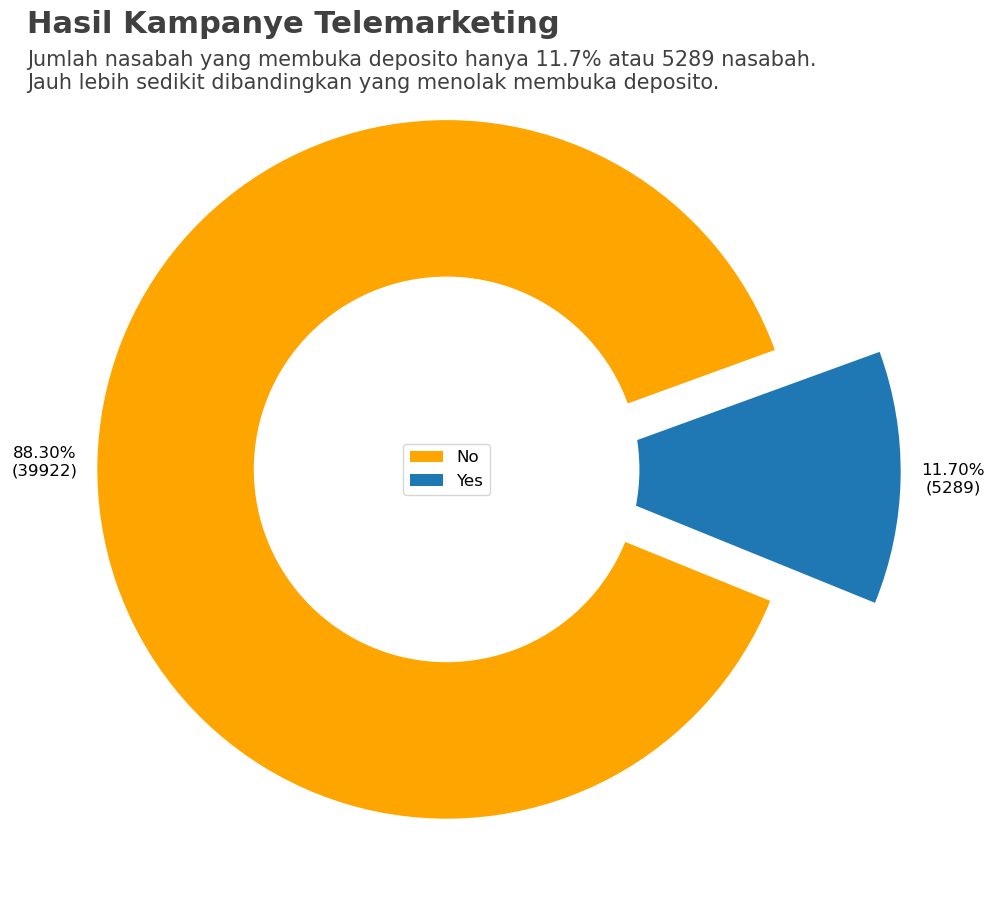

In [29]:
df_group_target = df_train.groupby('y').agg({'age':'count'}).reset_index().rename(columns={'age':'count'})
df_group_target['percentage'] = df_group_target['count']/len(df_train)*100
target = df_group_target['count']

# Creating autocpt arguments
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

# Creating plot
plt.figure(figsize=(10,10), facecolor='white')
plt.rcParams['font.size'] = 12
plt.pie(target,
        autopct = make_autopct(target),
        explode=[0, 0.3],
        colors=['orange', 'tab:blue'], 
        pctdistance=1.15,
        startangle=20)
circle = plt.Circle( (0,0), 0.55, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
# plt.title('Deposit Taken Pie Chart')
plt.legend(labels=['No','Yes'], loc='center', fontsize=12)
plt.text(x = -1.2, y = 1.25, s = "Hasil Kampanye Telemarketing",
               fontsize = 22, weight = 'bold', alpha = .75)
plt.text(x = -1.2, y = 1.09, s = "Jumlah nasabah yang membuka deposito hanya 11.7% atau 5289 nasabah. \nJauh lebih sedikit dibandingkan yang menolak membuka deposito.",
               fontsize = 15, alpha = .75)

plt.tight_layout()
plt.show()

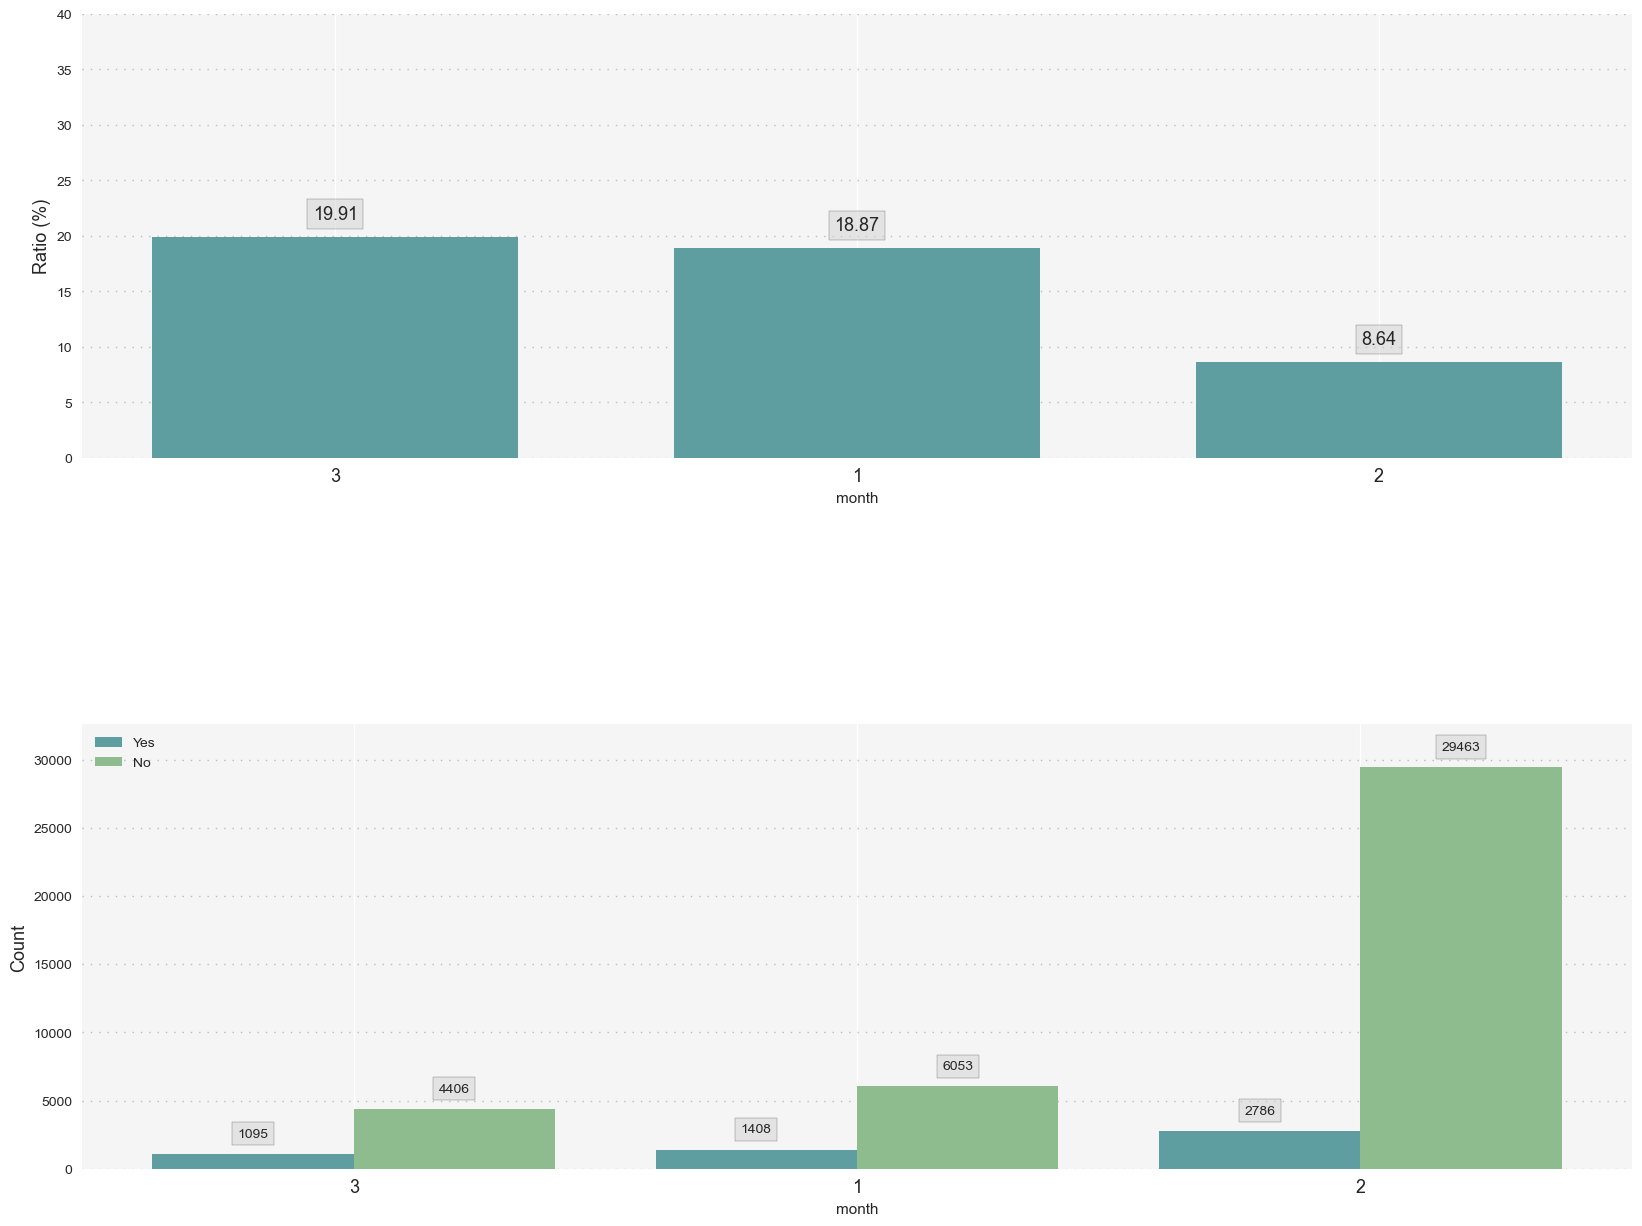

In [37]:
df_train['month'] = df_train['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                                                [1,1,1,1,2,2,2,2,3,3,3,3])
ratio_count('month', percent_height=40, fig_row=2, fig_col=1, h_space=0.6);

### Job Type Analysis on Term Deposit Account Subscriptions

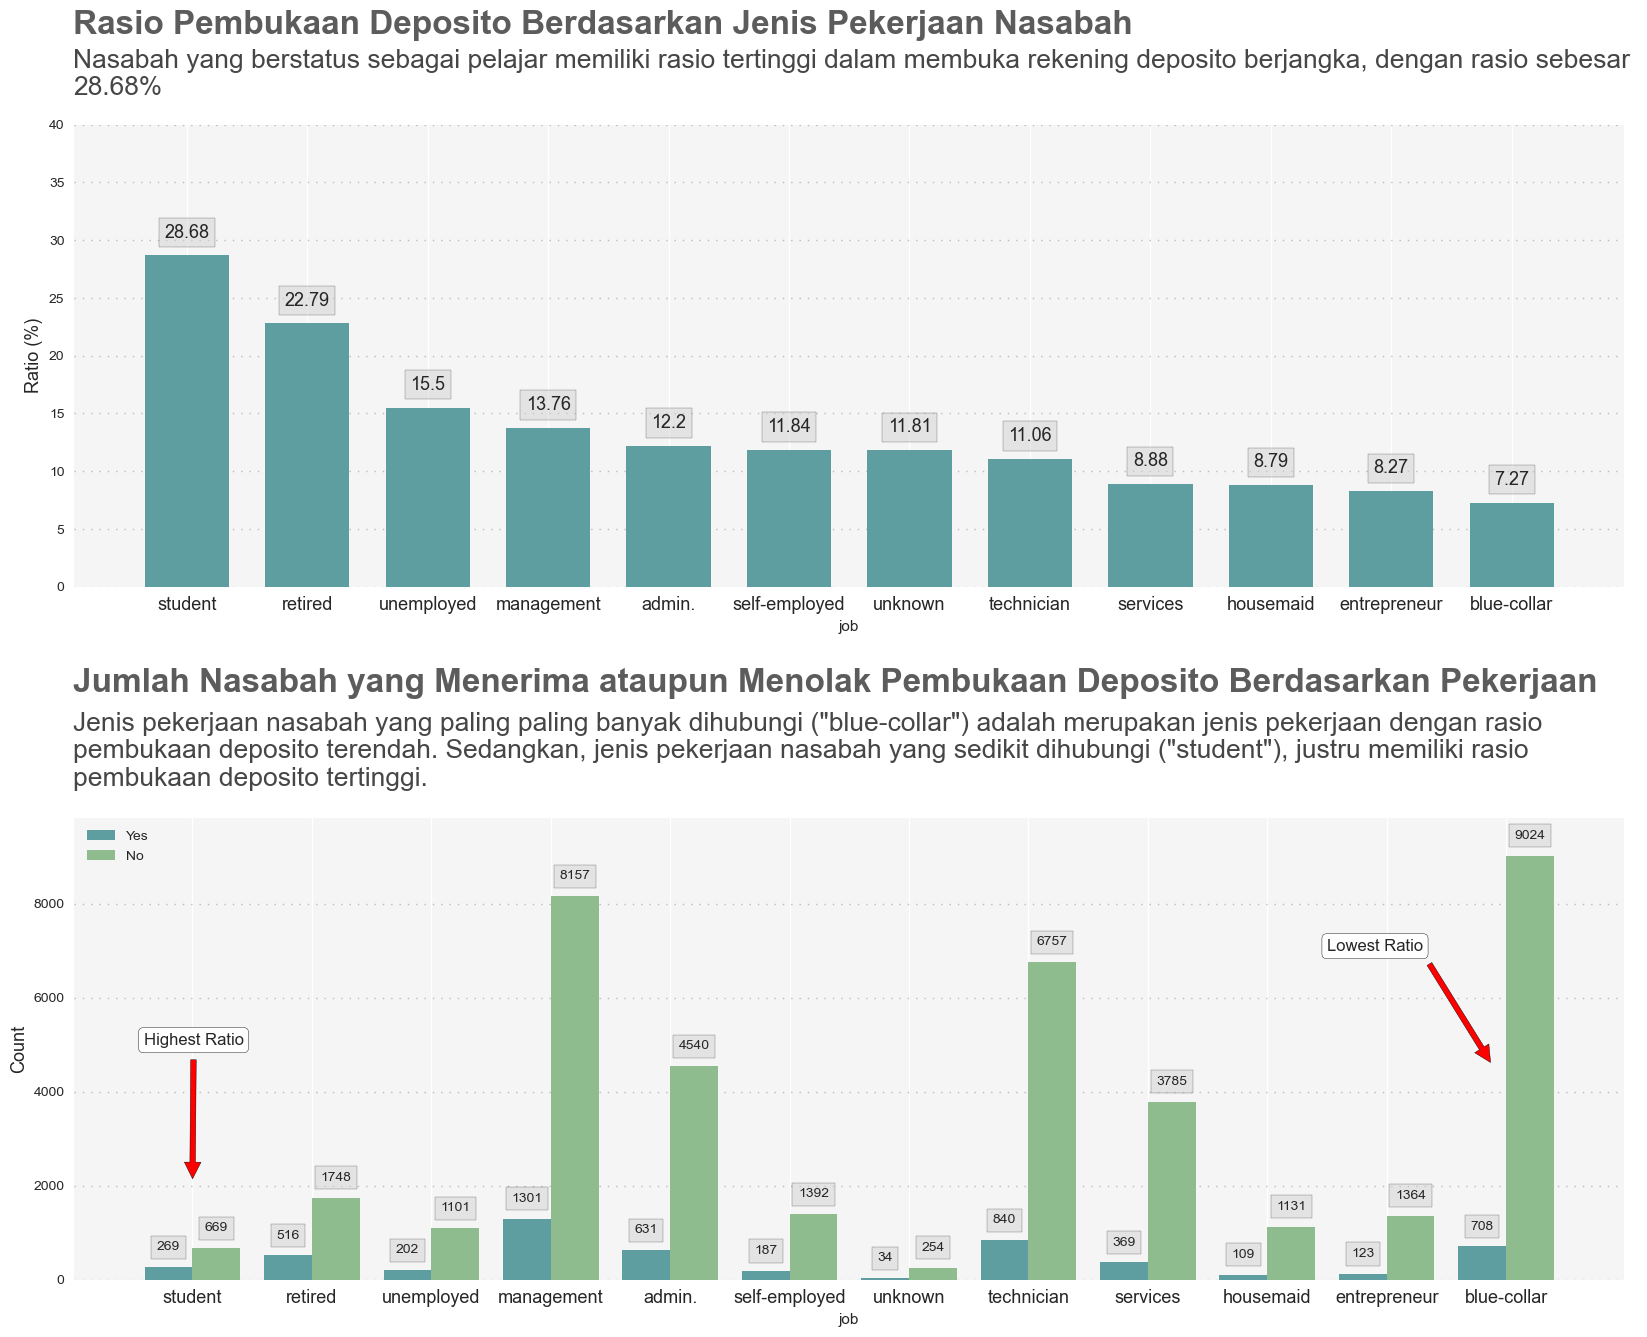

In [30]:
ratio_count('job', percent_height=40, fig_row=2, fig_col=1)
plt.text(x = -1, y = 26500, s = "Rasio Pembukaan Deposito Berdasarkan Jenis Pekerjaan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 25200,
               s = 'Nasabah yang berstatus sebagai pelajar memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar \n28.68%',
              fontsize = 19, alpha = .85)
plt.text(x = -1, y = 12500, s = "Jumlah Nasabah yang Menerima ataupun Menolak Pembukaan Deposito Berdasarkan Pekerjaan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -1, y = 10500,
               s = 'Jenis pekerjaan nasabah yang paling paling banyak dihubungi ("blue-collar") adalah merupakan jenis pekerjaan dengan rasio \npembukaan deposito terendah. Sedangkan, jenis pekerjaan nasabah yang sedikit dihubungi ("student"), justru memiliki rasio \npembukaan deposito tertinggi.',
              fontsize = 19, alpha = .85)

plt.annotate('Highest Ratio', xy =(0, 2000),
                xytext =(-0.41, 5000), 
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.annotate('Lowest Ratio', xy =(10.9
                                  , 4500),
                xytext =(9.5, 7000), 
                arrowprops = dict(facecolor ='red', shrink=0.05),
                fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

### Marital Status Analysis on Term Deposit Account Subscriptions

In [24]:
df_train.groupby('marital')['y'].count()

marital
divorced     5207
married     27214
single      12790
Name: y, dtype: int64

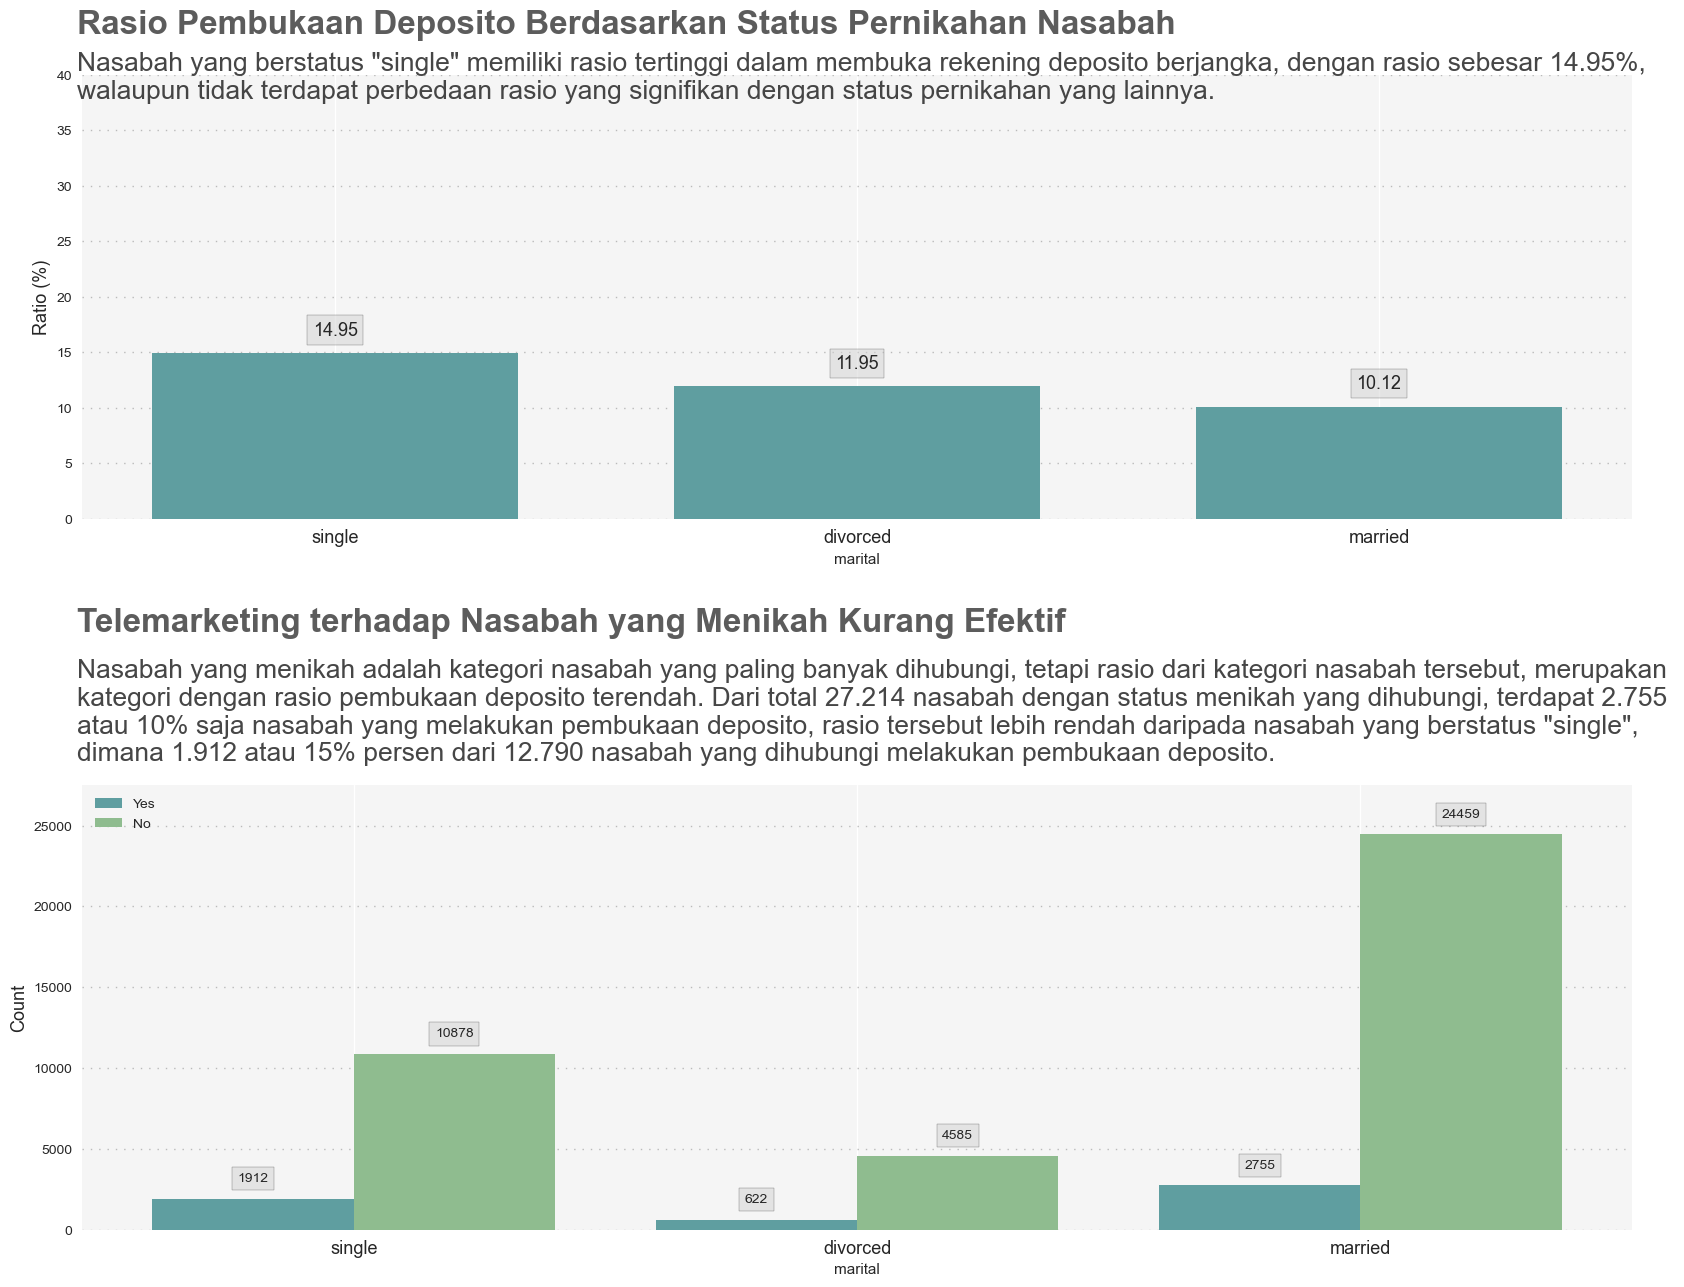

In [25]:
ratio_count('marital', percent_height=40, fig_row=2, fig_col=1, h_space=0.6)
plt.text(x = -0.55, y = 74000, s = "Rasio Pembukaan Deposito Berdasarkan Status Pernikahan Nasabah",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 70000,
               s = 'Nasabah yang berstatus "single" memiliki rasio tertinggi dalam membuka rekening deposito berjangka, dengan rasio sebesar 14.95%, \nwalaupun tidak terdapat perbedaan rasio yang signifikan dengan status pernikahan yang lainnya.',
              fontsize = 19, alpha = .85)
plt.text(x = -0.55, y = 37000, s = "Telemarketing terhadap Nasabah yang Menikah Kurang Efektif",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.55, y = 29000,
               s = 'Nasabah yang menikah adalah kategori nasabah yang paling banyak dihubungi, tetapi rasio dari kategori nasabah tersebut, merupakan \nkategori dengan rasio pembukaan deposito terendah. Dari total 27.214 nasabah dengan status menikah yang dihubungi, terdapat 2.755 \natau 10% saja nasabah yang melakukan pembukaan deposito, rasio tersebut lebih rendah daripada nasabah yang berstatus "single", \ndimana 1.912 atau 15% persen dari 12.790 nasabah yang dihubungi melakukan pembukaan deposito.',
              fontsize = 19, alpha = .85)

# plt.annotate('Highest Ratio', xy =(0, 2000),
#                 xytext =(-0.41, 5000), 
#                 arrowprops = dict(facecolor ='red', shrink=0.05),
#                 fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

# plt.annotate('Lowest Ratio', xy =(10.9
#                                   , 4500),
#                 xytext =(9.5, 7000), 
#                 arrowprops = dict(facecolor ='red', shrink=0.05),
#                 fontsize=12, bbox = dict(boxstyle ="round", fc ="1"))

plt.show()

### Education Background Analysis on Term Deposit Account Subscriptions

Text(0.35, 27, 'Highest Ratio')

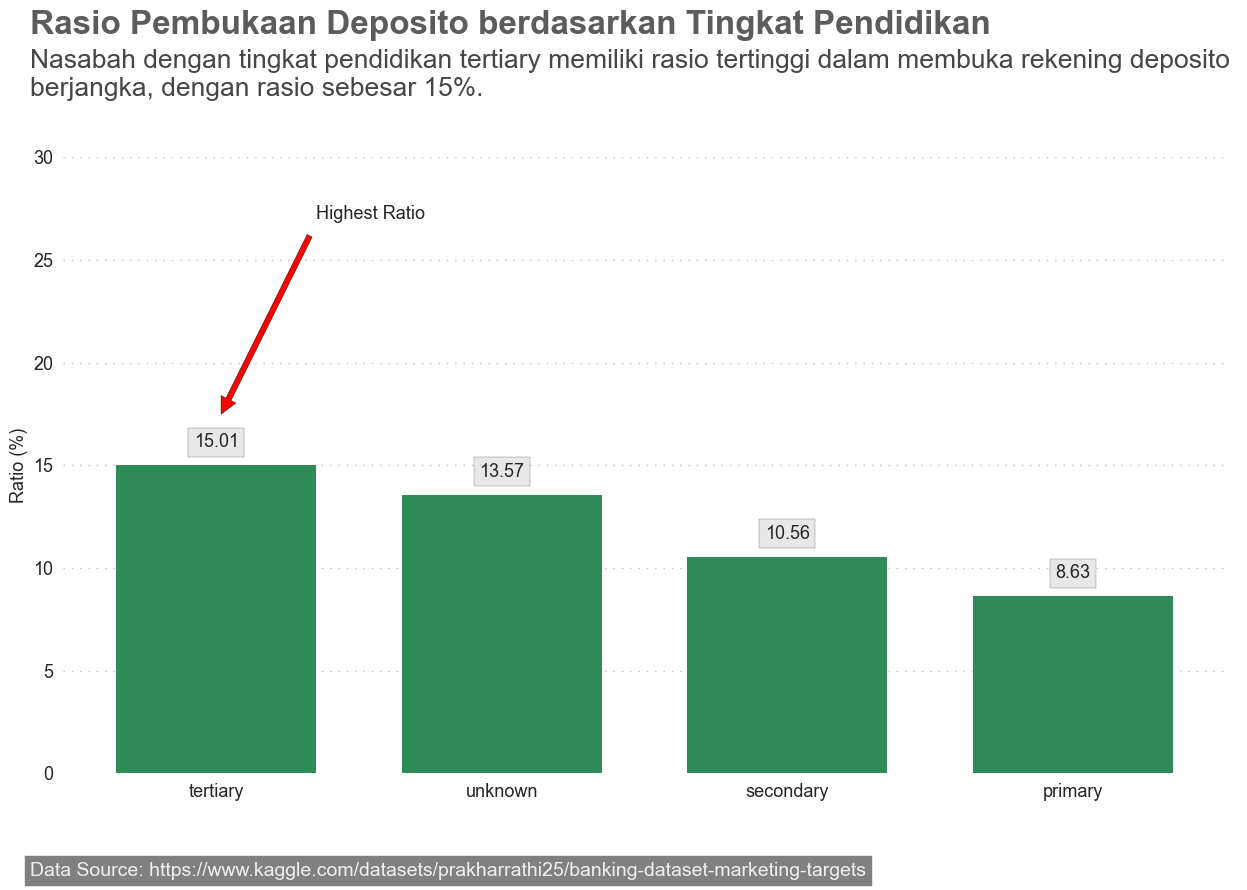

In [26]:
rasio('education', 30, 'seagreen')

## Menambahkan judul dan unsur grafis lainnya
plt.text(x = -0.65, y = 36, s = "Rasio Pembukaan Deposito berdasarkan Tingkat Pendidikan",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 33,
               s = 'Nasabah dengan tingkat pendidikan tertiary memiliki rasio tertinggi dalam membuka rekening deposito \nberjangka, dengan rasio sebesar 15%. ',
              fontsize = 19, alpha = .85)
plt.text(x = -0.65, y = -5,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')
plt.annotate('Highest Ratio', xy =(0, 17),
                xytext =(0.35, 27), 
                arrowprops = dict(facecolor ='red',
                                  shrink = 0.05),
                fontsize=13)

In [27]:
df_yes[(df_yes['duration'] >= 120) & (df_yes['duration'] <= 540)].count()


age             3001
job             3001
marital         3001
education       3001
default         3001
balance         3001
housing         3001
loan            3001
contact         3001
day             3001
month           3001
duration        3001
campaign        3001
pdays           3001
previous        3001
poutcome        3001
y               3001
duration_cut    3001
dtype: int64

In [28]:
3001/len(df_yes)

0.5674040461334846

### Duration Analysis on Term Deposit Account Subscriptions

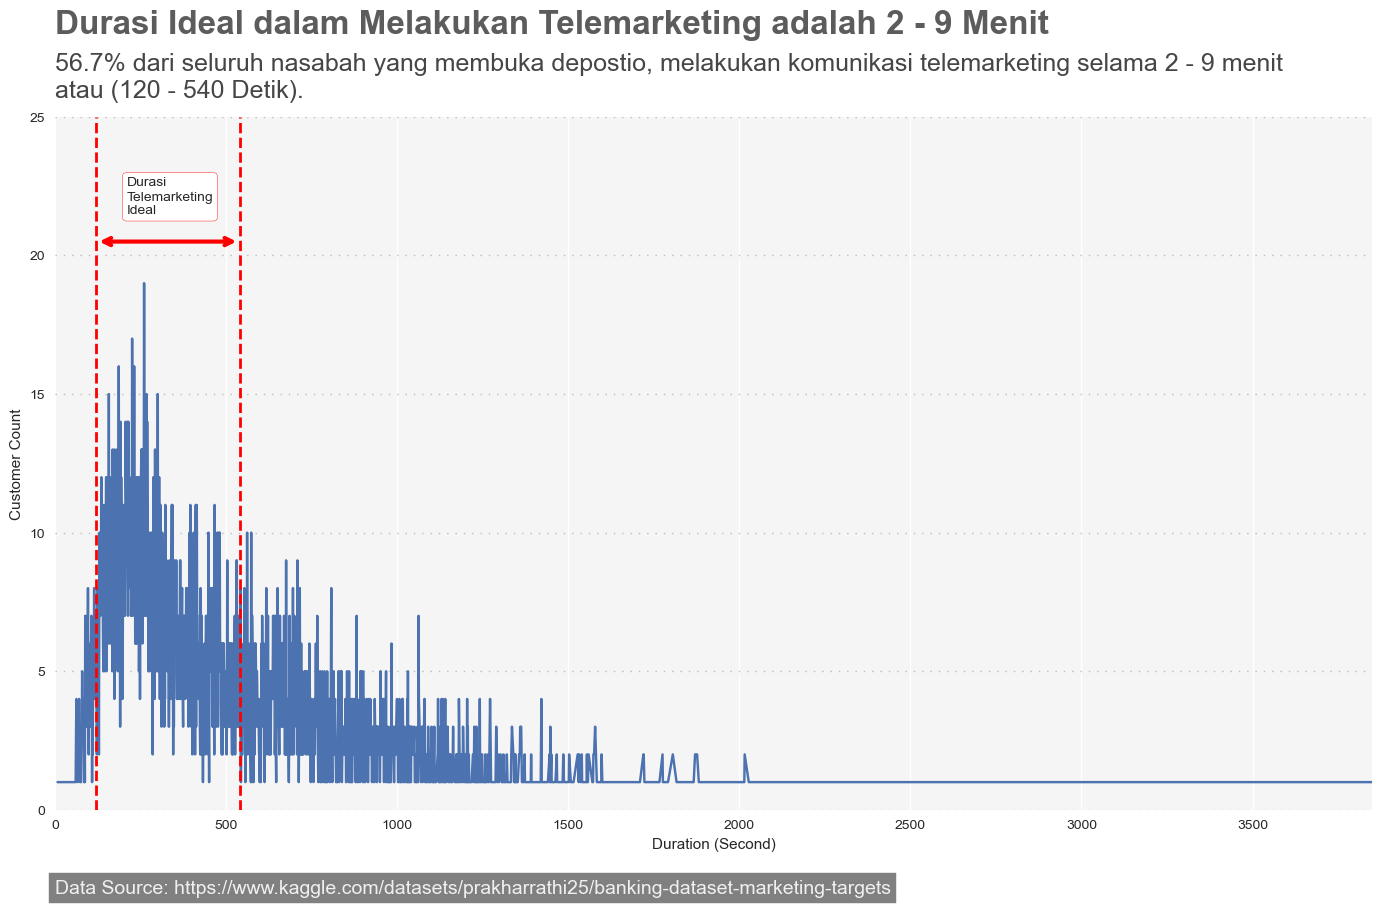

In [29]:
df_plot = df_yes.groupby('duration').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='duration', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Duration (Second)')
plt.axvline(x=120, linewidth=2, color='red', linestyle='--')
plt.axvline(x=540, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 3850)
plt.ylim(0, 25)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = -0.65, y = 28, s = "Durasi Ideal dalam Melakukan Telemarketing adalah 2 - 9 Menit",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = -0.65, y = 25.7,
               s = '56.7% dari seluruh nasabah yang membuka depostio, melakukan komunikasi telemarketing selama 2 - 9 menit \natau (120 - 540 Detik).',
              fontsize = 18, alpha = .85)
plt.text(x = -0.65, y = -3,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(122, 20.5),
                xytext =(539, 20.5), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 210, y = 21.5,
    s = 'Durasi\nTelemarketing\nIdeal',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
#plt.savefig('bizinsight1.png')
plt.show()


### Number of Contact During this Campaign Analysis on Term Deposit Account Subscriptions

In [ ]:
df_yes[(df_yes['campaign'] >= 1) & (df_yes['campaign'] <= 3)].count()

age          4580
job          4580
marital      4580
education    4580
default      4580
balance      4580
housing      4580
loan         4580
contact      4580
day          4580
month        4580
duration     4580
campaign     4580
pdays        4580
previous     4580
poutcome     4580
y            4580
dtype: int64

In [ ]:
4580/len(df_yes)

0.8659481943656646

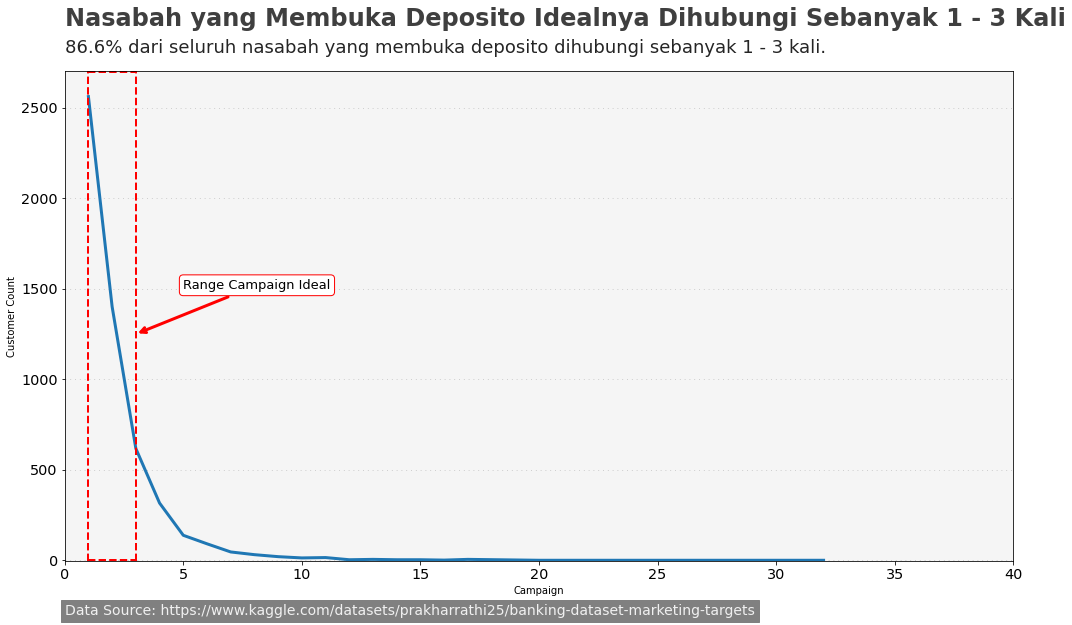

In [ ]:
from matplotlib.patches import Rectangle

df_plot = df_yes.groupby('campaign').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='campaign', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Campaign')
plt.axvline(x=1, linewidth=2, color='red', linestyle='--')
plt.axvline(x=3, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=2695, linewidth=2, color='red', linestyle='--')
ax1.hlines(xmin=1, xmax=3, y=0, linewidth=2, color='red', linestyle='--')
plt.xlim(0, 40)
plt.ylim(-1, 2700)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 0, y = 2950, s = "Nasabah yang Membuka Deposito Idealnya Dihubungi Sebanyak 1 - 3 Kali",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 0, y = 2800,
               s = '86.6% dari seluruh nasabah yang membuka deposito dihubungi sebanyak 1 - 3 kali.',
              fontsize = 18, alpha = .85)
plt.text(x = 0, y = -300,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('Range Campaign Ideal', xy =(3, 1250),
                xytext =(5, 1500), 
                arrowprops = dict(arrowstyle="->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13, bbox = dict(boxstyle ="round", fc ="1", color='r'))


# plt.text(x = -0.65, y = 21.5,
#     s = 'Ideal\nTelemarketing\nDuration',fontsize = 10, bbox = dict(boxstyle ="round", fc ="1", color='r'))
# plt.savefig('bizinsight2.png')
plt.show()

### Customer Age Analysis on Term Deposit Account Subscriptions

In [55]:
df_yes[(df_yes['age'] >= 25) & (df_yes['age'] <= 40)].count()

age          2750
job          2750
marital      2750
education    2750
default      2750
balance      2750
housing      2750
loan         2750
contact      2750
day          2750
month        2750
duration     2750
campaign     2750
pdays        2750
previous     2750
poutcome     2750
y            2750
dtype: int64

In [56]:
2750/len(df_yes)

0.5199470599357157

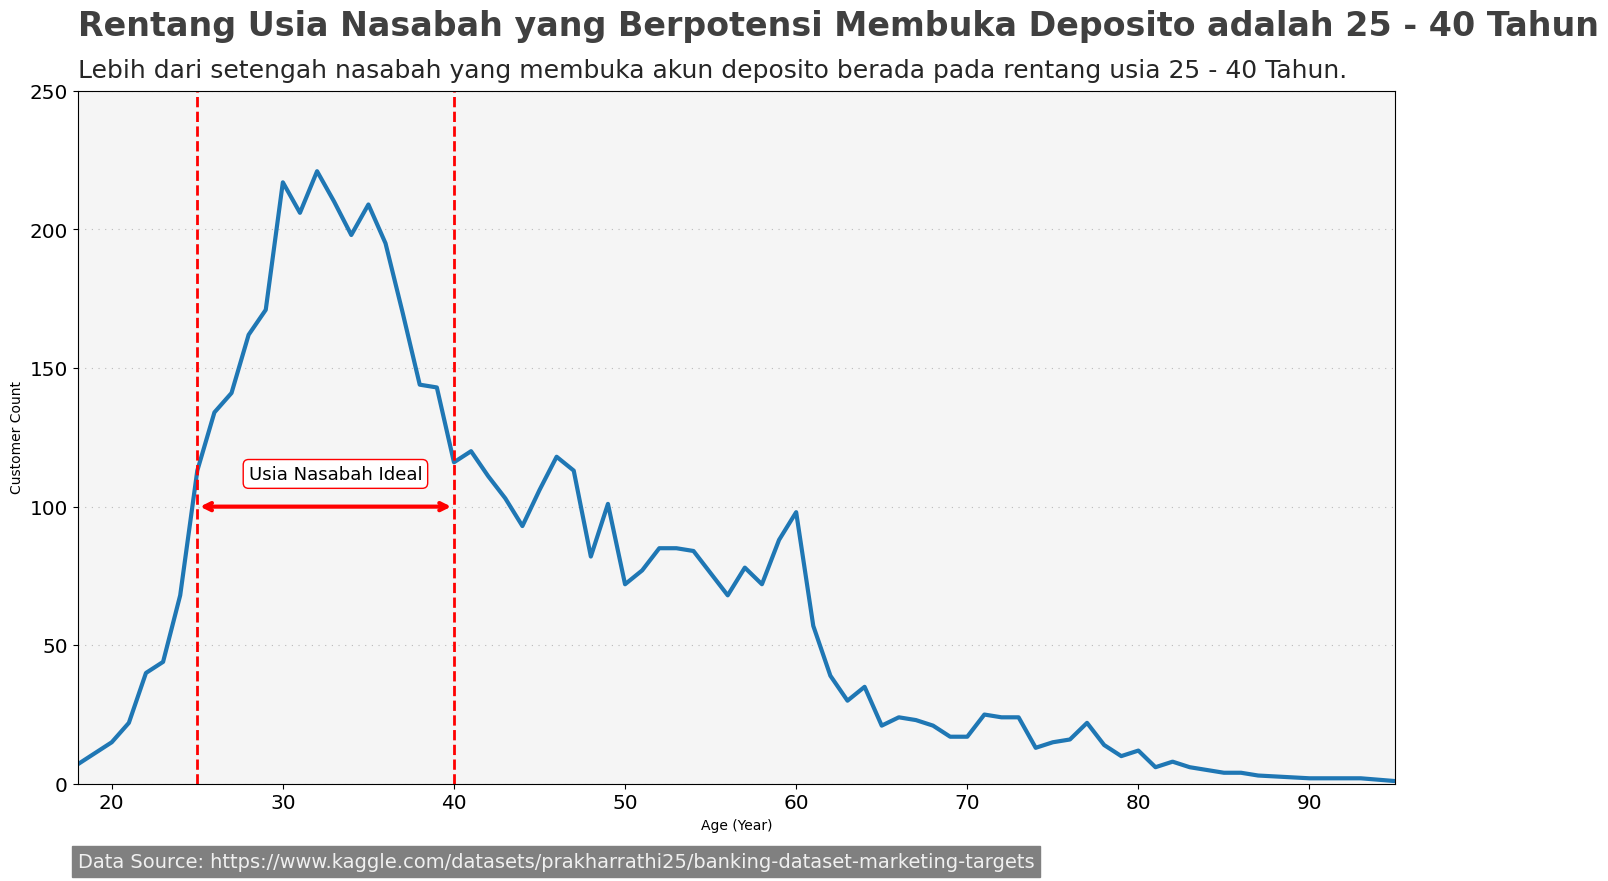

In [54]:
df_plot = df_yes.groupby('age').agg({'y':'count'}).reset_index().sort_values('y')

fig, ax1 = plt.subplots()
fig.set_figheight(9)
fig.set_figwidth(17)

sns.lineplot(data=df_plot, x='age', y='y')
plt.ylabel('Customer Count')
plt.xlabel('Age (Year)')
plt.axvline(x=25, linewidth=2, color='red', linestyle='--')
plt.axvline(x=40, linewidth=2, color='red', linestyle='--')
plt.xlim(18, 95)
plt.ylim(0, 250)

ax1.grid(which="major", axis="y", zorder=0, color="gray", linestyle=":", dashes=(1, 5), alpha=0.5,)
ax1.set_facecolor('whitesmoke')
    
plt.text(x = 18, y = 270, s = "Rentang Usia Nasabah yang Berpotensi Membuka Deposito adalah 25 - 40 Tahun",
               fontsize = 24, weight = 'bold', alpha = .75)
plt.text(x = 18, y = 255,
               s = 'Lebih dari setengah nasabah yang membuka akun deposito berada pada rentang usia 25 - 40 Tahun.',
              fontsize = 18, alpha = .85)
plt.text(x = 18, y = -30,
    s = 'Data Source: https://www.kaggle.com/datasets/prakharrathi25/banking-dataset-marketing-targets',fontsize = 14, color = '#f0f0f0', backgroundcolor = 'grey')

plt.annotate('', xy =(25, 100),
                xytext =(40, 100), 
                arrowprops = dict(arrowstyle="<->", connectionstyle="arc3", color='r', lw=3),
                fontsize=13)

plt.text(x = 28, y = 110,
    s = 'Usia Nasabah Ideal',fontsize = 13, bbox = dict(boxstyle ="round", fc ="1", color='r'))
#plt.savefig('bizinsight3.png')
plt.show()

# Stage 2

### Data Pre-Prosesing

In [31]:
#metode Zscore
df_t=df_test.copy()
col=['age','balance','duration','day','campaign','pdays','previous']
for i in col:
  z_scores = np.abs(st.zscore(df_train[i]))
  fe = (z_scores < 3)
  df_clean = df_train[fe]
p=len(df_train)-len(df_clean)
persn=p/len(df_train)*100
print(len(df_train))
print(len(df_clean))
print(persn)

45211
44629
1.287297339143129


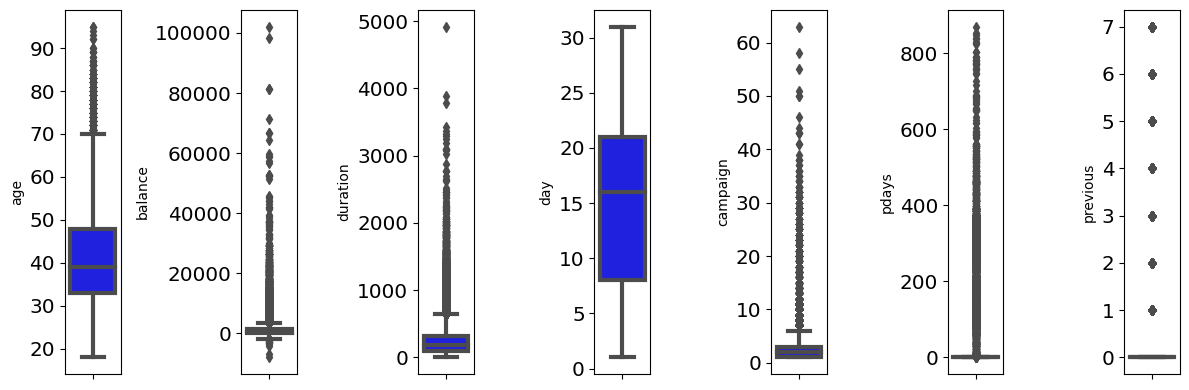

In [7]:
# Univariate analysis terhadap kolom numerikal menggunakan boxplot
for i in range(0, len(col)):
  plt.subplot(1,len(col),i+1)
  sns.boxplot(y=df_clean[col[i]], color='blue', orient='v')
  plt.tight_layout();

Catata:
- Outlier yang cukup banyak membuat metode zscore lebih baik di gunakan pada data ini agar tidak membuang banyak data
penggunaan z score menghapus 1,28%, penggunaan IQR menghapus 15% ke atas

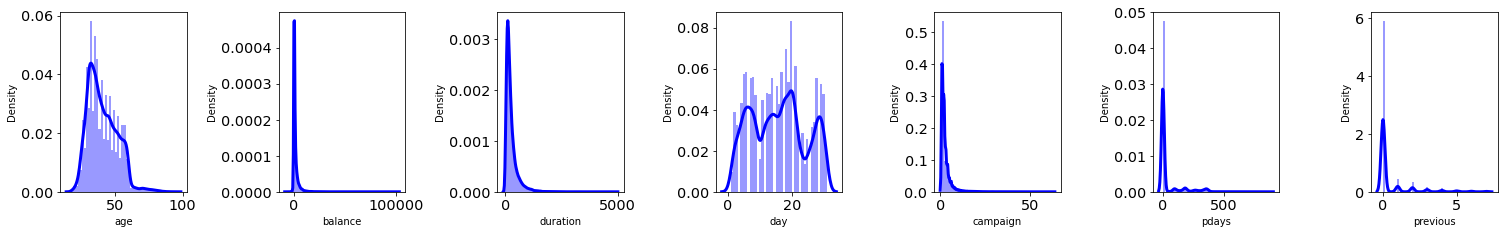

In [ ]:
# Pengecekan distribusi data sesudah Handling Outlier
plt.figure(figsize=(21, 6))
for i in range(0, len(col)):
    plt.subplot(2, len(col), i+1)
    sns.distplot(df_clean[col[i]], color='blue');
    plt.tight_layout()

In [ ]:
#skewness value
for i in range(0, len(col)):
    print(f"Skewness {df_clean[col].columns[i]} : {round(df_clean[col[i]].skew(),2)}")

Skewness age : 0.68
Skewness balance : 8.39
Skewness duration : 3.15
Skewness day : 0.09
Skewness campaign : 4.91
Skewness pdays : 2.71
Skewness previous : 3.29


Catatan:
- skewness yang masih cukup tinggi pada beberapa kolom membuat kita harus melakukan penanganan lebih lanjut

In [32]:
for i in col:
    df_clean[i]=StandardScaler().fit_transform(df_clean[i].values.reshape(len(df_clean),1))

for c in col:
    df_t[c]=StandardScaler().fit_transform(df_t[c].values.reshape(len(df_t),1))


In [33]:
power=PowerTransformer(method='yeo-johnson')
for i in col:
    df_clean[i]=power.fit_transform(df_clean[i].values.reshape(len(df_clean),1))

Catatan :
- Scaling data menggunakan StandardScaler dan transform menggunakan yeo johson di lakukan agar adanya standarisasi terhadap nilai pada tiap-tiap kolom dan mengubah distribusi mendakati normal

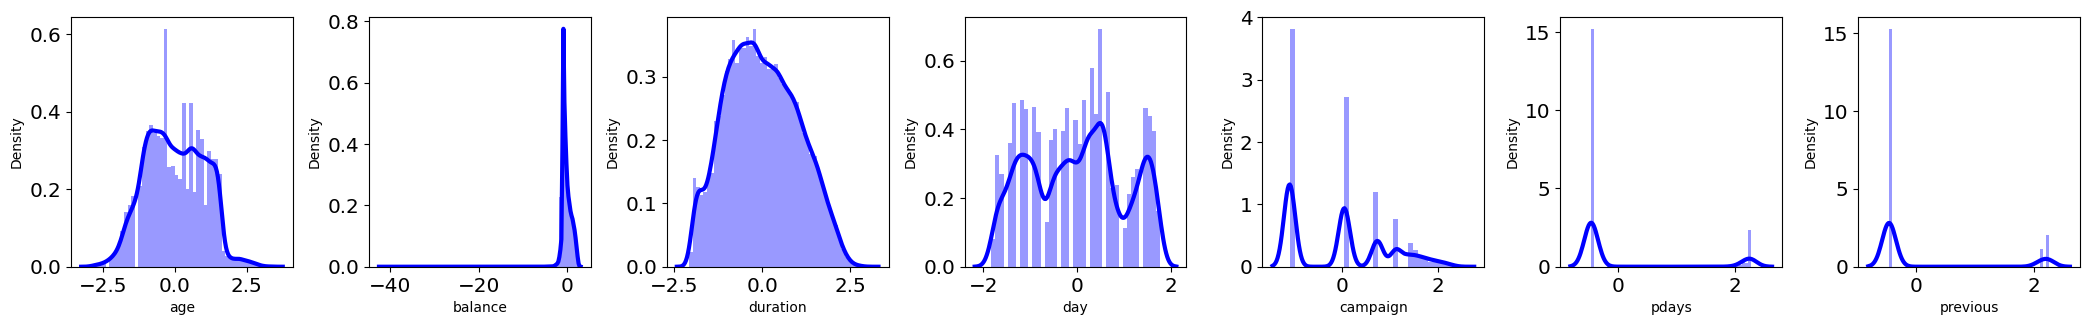

In [10]:
plt.figure(figsize=(21, 6))
for i in range(0, len(col)):
    plt.subplot(2, len(col), i+1)
    sns.distplot(df_clean[col[i]], color='blue');
    plt.tight_layout()

In [ ]:
#skewness value
for i in range(0, len(col)):
    print(f"Skewness {df_clean[col].columns[i]} : {round(df_clean[col[i]].skew(),2)}")

Skewness age : 0.05
Skewness balance : -2.02
Skewness duration : 0.16
Skewness day : 0.02
Skewness campaign : 0.35
Skewness pdays : 1.77
Skewness previous : 1.74


### Futureing Data

In [34]:
# df_t=df_test.copy()
col=['job','education','contact','poutcome']
for i in col:
    df_clean[i]= df_clean[i].str.replace('unknown','other')

col_t=['job','education','contact','poutcome']
for c in col_t:
    df_t[c]= df_t[c].str.replace('unknown','other')

In [35]:
 #Lebel Encoding
lebel=['default','housing','loan','y']
for i in lebel:
    lebel_encoder = LabelEncoder()
    df_clean[i] = lebel_encoder.fit_transform(df_clean[i])

lebel_t=['default','housing','loan','y']
for c in lebel_t:
    lebel_encoder = LabelEncoder()
    df_t[c] = lebel_encoder.fit_transform(df_t[c])
df_clean.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
19818,-0.255963,technician,married,secondary,0,-0.061012,0,0,cellular,-0.940307,aug,0.365187,1.542511,-0.452187,-0.455563,other,0
28335,-1.390445,self-employed,single,tertiary,0,-0.834140,1,0,cellular,1.548587,jan,0.970917,-1.075013,2.243732,2.107390,failure,0
38036,-1.390445,technician,single,secondary,0,-0.829909,1,0,cellular,-0.195369,may,0.017035,0.056199,-0.452187,-0.455563,other,0
42783,1.341672,technician,married,tertiary,0,0.441424,0,0,cellular,1.436103,jan,-0.013795,-1.075013,2.268574,2.107390,failure,1
1460,-0.607297,management,married,secondary,0,-0.216880,1,0,other,-0.940307,may,1.153224,0.056199,-0.452187,-0.455563,other,0


In [36]:
map_edu = {
        "other" : 0,
        "primary" : 1,
        "secondary" : 2,
        "tertiary" : 3
        }
map_pou = {"other" : 0,
        "failure" : 1,
        "success" : 2
        }
map_job = {
        'other':0,
        'student':1,
        'unemployed':2,
        'entrepreneur':3,
        'self-employed':4,
        'retired':5,
        'services':6,
        'admin.':7,
        'technician':8,
        'management':9,
        'blue-collar':10   
}


In [37]:

df_clean['education'] = df_clean['education'].map(map_edu)
# df_clean['poutcome'] = df_clean['poutcome'].map(map_pou)
# df_clean['job'] = df_clean['job'].map(map_job)

# df_t['job'] = df_t['job'].map(map_job)
df_t['education'] = df_t['education'].map(map_edu)
# df_t['poutcome'] = df_t['poutcome'].map(map_pou)

df_clean.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
44543,-1.530460,self-employed,single,3,0,1.699024,0,0,cellular,-0.440879,aug,-0.006039,0.056199,-0.452187,-0.455563,other,0
35079,0.769512,entrepreneur,divorced,2,0,-0.831319,1,1,cellular,-1.193541,may,1.472258,0.056199,2.261424,2.253630,failure,0
23368,-0.730672,management,single,3,0,0.583284,1,1,cellular,1.323224,aug,-0.883723,1.990835,-0.452187,-0.455563,other,0
7597,-0.255963,services,married,3,0,-0.834140,1,0,other,1.660695,may,-1.327680,-1.075013,-0.452187,-0.455563,other,0
37018,0.690549,services,married,2,0,-0.975383,1,1,telephone,-0.317728,may,0.170377,-1.075013,-0.452187,-0.455563,other,0


In [38]:
label=['job','marital','contact','poutcome']
for i in label:
    ohe =pd.get_dummies(df_clean[i],prefix=i)
    df_clean=df_clean.join(ohe)

label_t=['job','marital','contact','poutcome']
for c in label_t:
    ohe_t =pd.get_dummies(df_t[c],prefix=c)
    df_t=df_t.join(ohe_t)

df_clean.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_other,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
3468,1.274959,technician,married,2,0,0.052476,1,0,other,-0.073874,...,0,0,1,0,0,1,0,0,1,0
25202,-0.730672,admin.,married,3,0,-0.697409,1,1,cellular,0.284867,...,0,0,1,0,1,0,0,0,1,0
24740,1.137851,technician,married,2,0,-0.168847,0,0,cellular,0.284867,...,0,0,1,0,1,0,0,0,1,0
33274,0.609471,technician,married,2,0,-0.402166,1,0,cellular,0.519805,...,0,0,1,0,1,0,0,0,1,0
40496,1.137851,management,divorced,3,0,1.978289,1,0,cellular,-1.066659,...,0,1,0,0,1,0,0,0,1,0


Catatan:
- penggunaan labeling encoder pada kolom 'default','housing','loan','y'untuk kategori yang nilai binari
- penggunaan map pada kolom education dan poutcome karena kolom kolom tersebut memiliki nilai hirarki
- Penggunaan dummies data/one hot encoder pada colom kategori yang tidak memiliki nilai hirarki ()

In [39]:
hapus=['job','marital','contact','day','month','pdays','poutcome']
df_clean = df_clean.drop(hapus,axis=1)
df_t = df_t.drop(hapus,axis=1)

In [15]:
df_clean.sample(5)

,age,education,default,balance,housing,loan,duration,campaign,previous,y,...,job_unemployed,marital_divorced,marital_married,marital_single,contact_cellular,contact_other,contact_telephone,poutcome_failure,poutcome_other,poutcome_success
10124,0.526078,3,0,-0.306607,0,0,-0.369700,-1.075013,-0.455563,0,...,0,0,1,0,0,1,0,0,1,0
4818,-0.607297,2,0,0.461513,1,0,1.870843,-1.075013,-0.455563,1,...,0,0,1,0,0,1,0,0,1,0
34135,1.274959,1,0,1.418314,1,1,-0.850925,-1.075013,-0.455563,0,...,0,0,1,0,0,0,1,0,1,0
19748,1.067300,2,0,1.785496,0,0,-0.630379,0.056199,-0.455563,0,...,0,1,0,0,1,0,0,0,1,0
14353,-0.145492,2,0,0.271958,1,0,1.721513,0.739410,-0.455563,1,...,0,0,1,0,1,0,0,0,1,0


In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44629 entries, 0 to 45209
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                44629 non-null  float64
 1   education          44629 non-null  int64  
 2   default            44629 non-null  int32  
 3   balance            44629 non-null  float64
 4   housing            44629 non-null  int32  
 5   loan               44629 non-null  int32  
 6   duration           44629 non-null  float64
 7   campaign           44629 non-null  float64
 8   previous           44629 non-null  float64
 9   y                  44629 non-null  int32  
 10  job_admin.         44629 non-null  uint8  
 11  job_blue-collar    44629 non-null  uint8  
 12  job_entrepreneur   44629 non-null  uint8  
 13  job_housemaid      44629 non-null  uint8  
 14  job_management     44629 non-null  uint8  
 15  job_other          44629 non-null  uint8  
 16  job_retired        446

In [25]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                4521 non-null   int64
 1   education          4521 non-null   int64
 2   default            4521 non-null   int32
 3   balance            4521 non-null   int64
 4   housing            4521 non-null   int32
 5   loan               4521 non-null   int32
 6   duration           4521 non-null   int64
 7   campaign           4521 non-null   int64
 8   previous           4521 non-null   int64
 9   y                  4521 non-null   int32
 10  job_admin.         4521 non-null   uint8
 11  job_blue-collar    4521 non-null   uint8
 12  job_entrepreneur   4521 non-null   uint8
 13  job_housemaid      4521 non-null   uint8
 14  job_management     4521 non-null   uint8
 15  job_other          4521 non-null   uint8
 16  job_retired        4521 non-null   uint8
 17  job_self-emplo

In [38]:
# df_t['job'].fillna(0,inplace=True)
# df_clean['job'].fillna(0,inplace=True)

Catatan : 
- Mengahpus kolom job, marital, contact, poutcome yang sudah di gantikan dengan kolom dummies
- Penghapusan kolom month karena tidak memiliki pola yang berarti dan korelasi yg signifikan
- penghapusan kolom pdays karena memiliki korelasi yg cukup tinggi pada data ini dengan previous yang berpotensi redunden

In [ ]:
# df=

In [60]:
# Pemisahan Feture dan Target
X=df_clean.drop('y',axis=1)
y=df_clean['y']

In [61]:
# Handeling Imbalance dengan OverSampleling & #Pemisahan Feture dan Target
X_train,y_train = SMOTE().fit_resample(X,y)
X_test=df_t.drop('y',axis=1)
y_test=df_t['y']

In [19]:
#Pengngecekan Data Target
print('Sebelum Imbalance :')
print(pd.Series(y).value_counts())
print('Sesudah Imbalance :')
print(pd.Series(y_train).value_counts())
print('data test :')
print(pd.Series(y_test).value_counts())
print((521/4000)*100)

Sebelum Imbalance :
0    39483
1     5146
Name: y, dtype: int64
Sesudah Imbalance :
0    39483
1    39483
Name: y, dtype: int64
data test :
0    4000
1     521
Name: y, dtype: int64
13.025


# Stage 3

## Model Machine Learning

In [42]:
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [62]:
# Membuat Fungction

def comparation(models):
    model_list = []
    acc_list = []
    prec_list = []
    rec_list = []
    auc_list = []
    cm_list = []
    f1_score_value = []
    roc_auc_train= []
    roc_auc_test = []
    roc_auc_crossval_train = []
    roc_auc_crossval_test = []

    for model in models:
        model_list.append(model.__class__.__name__)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        y_pred_proba = model.predict_proba(X_test)
        y_pred_proba_train = model.predict_proba(X_train)
        acc_list.append(metrics.accuracy_score(y_test, y_pred))
        prec_list.append(metrics.precision_score(y_test, y_pred))
        rec_list.append(metrics.recall_score(y_test, y_pred))
        f1_score_value.append(metrics.f1_score(y_test, y_pred))
        roc_auc_train.append(metrics.roc_auc_score(y_train, y_pred_proba_train[:, 1]))
        roc_auc_test.append(metrics.roc_auc_score(y_test, y_pred_proba[:, 1]))
        score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
        roc_auc_crossval_train.append(str(score['train_score'].mean()))
        roc_auc_crossval_test.append(str(score['test_score'].mean()))
    
def eval_classification(model,ml):
    
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Eval Classification : ",ml)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def eval(model,ml):
    y_pred = model.predict(X)
    print("Eval Classification : ",ml)
    print("Accuracy (Test Set): %.2f" % accuracy_score(y, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y, y_pred))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())


def draw_learning_curve_RForest(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = RandomForestClassifier(random_state=35,n_estimators=24,criterion='gini',max_depth=9,min_samples_split=c,min_samples_leaf=34)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()
def draw_learning_curve_tree(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = DecisionTreeClassifier(random_state=42,criterion='gini',max_depth=6,min_samples_split=20,min_samples_leaf =50)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.legend()
    plt.show()
def draw_learning_curve_lr(param_values):

    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2',C=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        print('Sisa : ' + str(train_auc-test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()
def draw_learning_curve_adaboost(param_values):

    train_scores = []
    test_scores = []

    for c in param_values:
        model = AdaBoostClassifier(n_estimators=c)
        model.fit(X_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(X_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(X_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))
        
    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

In [63]:

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

# comparation(models)

model_list = []
acc_list = []
prec_list = []
rec_list = []
auc_list = []
cm_list = []
f1_score_value = []
roc_auc_train= []
roc_auc_test = []
roc_auc_crossval_train = []
roc_auc_crossval_test = []

for model in models:
    model_list.append(model.__class__.__name__)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    acc_list.append(metrics.accuracy_score(y_test, y_pred))
    prec_list.append(metrics.precision_score(y_test, y_pred))
    rec_list.append(metrics.recall_score(y_test, y_pred))
    f1_score_value.append(metrics.f1_score(y_test, y_pred))
    roc_auc_train.append(metrics.roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    roc_auc_test.append(metrics.roc_auc_score(y_test, y_pred_proba[:, 1]))
    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    roc_auc_crossval_train.append(str(score['train_score'].mean()))
    roc_auc_crossval_test.append(str(score['test_score'].mean()))

In [64]:
result_df = pd.DataFrame({'Model': model_list, 'Accuracy': acc_list, 'Precision': prec_list, 'Recall': rec_list,'f1_score': f1_score_value,'roc_auc_train': roc_auc_train ,'roc_auc_test' : roc_auc_test,'roc_auc_crossval_train': roc_auc_crossval_train,'roc_auc_crossval_test': roc_auc_crossval_test})
result_df

,Model,Accuracy,Precision,Recall,f1_score,roc_auc_train,roc_auc_test,roc_auc_crossval_train,roc_auc_crossval_test
0,LogisticRegression,0.867728,0.447761,0.633397,0.524642,0.932196,0.875103,0.8943980710551316,0.8707614882425029
1,DecisionTreeClassifier,0.460518,0.137292,0.696737,0.229384,1.000000,0.563244,1.0,0.6258831079998103
2,RandomForestClassifier,0.814864,0.356364,0.752399,0.483652,1.000000,0.861524,1.0,0.8328523238693162
3,AdaBoostClassifier,0.798938,0.337793,0.775432,0.470588,0.931751,0.861129,0.9041818280241332,0.8736362431201433
4,XGBClassifier,0.224287,0.128607,0.992322,0.227703,0.991143,0.750270,0.9597834902165218,0.8318642946437439


In [90]:
# param_values = [float(x) for x in np.linspace(0.0001, 0.1, 50)]
# draw_learning_curve_lr(param_values)

In [67]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval_classification(lr,'LogisticRegression')

Eval Classification :  LogisticRegression
Accuracy (Test Set): 0.87
Precision (Test Set): 0.45
Recall (Test Set): 0.63
F1-Score (Test Set): 0.52
roc_auc (test-proba): 0.88
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.8943980710551316
roc_auc (crossval test): 0.8707614882425029


In [66]:
lr = LogisticRegression(penalty='l2',C=0.0002,class_weight='balanced')
lr.fit(X_train, y_train)
eval_classification(lr,'LogisticRegression')

Eval Classification :  LogisticRegression
Accuracy (Test Set): 0.84
Precision (Test Set): 0.39
Recall (Test Set): 0.66
F1-Score (Test Set): 0.49
roc_auc (test-proba): 0.87
roc_auc (train-proba): 0.90
roc_auc (crossval train): 0.8788008295012908
roc_auc (crossval test): 0.8609163211643771


In [136]:
# matrix=confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = matrix.ravel()
# print('Prediksi True :',tp,fp)
# print('Prediksi False :',fn,tn)

matrix=confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = matrix.ravel()


# plt.matshow(matrix)
# plt.colorbar()

# plt.title('Confusion Matrix')
# plt.ylabel('Aktual')
# plt.xlabel('Prediksi');

print('TP :',tp,'FP',fp)
print('FN :',fn,'TN',tn)


TP : 519 FP 3677
FN : 2 TN 323


In [68]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval(lr,'LogisticRegression')

Eval Classification :  LogisticRegression
Accuracy (Test Set): 0.83
Precision (Test Set): 0.38
Recall (Test Set): 0.75
F1-Score (Test Set): 0.51


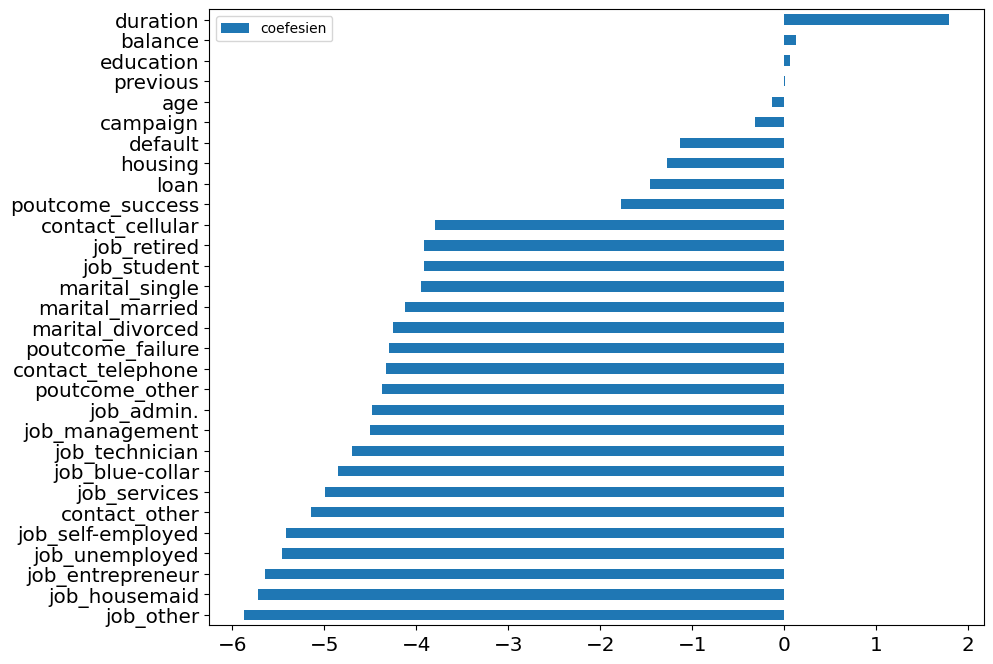

In [69]:
coefesien=pd.DataFrame(lr.coef_,columns=X.columns)
cof=coefesien.transpose()
cof.columns = ['coefesien']
features_importen=cof.sort_values('coefesien',ascending=True)
features_importen.plot(kind='barh', figsize=(10, 8));

In [195]:
n_estimators = [int(x) for x in np.linspace(1,24,24)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(1,8, 8)]
min_samples_split = [int(x) for x in np.linspace(2,16,15)]
min_samples_leaf = [int(x) for x in np.linspace(2,42,40)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=30)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19, 20, 21, 22,
                                                             23, 24, 25, 26, 27,
                                                             28, 29, 30, 31, ...],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24]},
                   random_state=1, scoring='roc_auc')

## Evaluation Model

In [198]:
eval_classification(rs,'RandomForestClassifier + Randomized Search')

Eval Classification :  RandomForestClassifier + Randomized Search
Accuracy (Test Set): 0.80
Precision (Test Set): 0.34
Recall (Test Set): 0.77
F1-Score (Test Set): 0.47
roc_auc (test-proba): 0.85
roc_auc (train-proba): 0.93
roc_auc (crossval train): 0.8996786504626396
roc_auc (crossval test): 0.834240304077075


In [ ]:
%pip install shap

In [70]:
df_train_bs = df_train.copy()

In [71]:
cost_per_minute = 1.79 #Asumsi cost per minute = 1.79 EUR
df_train_bs['cost'] = df_train_bs['duration']/60*cost_per_minute
df_train_bs

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,cost
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,7.786500
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,4.504833
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,2.267333
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2.744667
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,5.907000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,29.147167
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,13.604000
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,33.622167
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,15.155333


In [72]:
campaign_cost = round(7.7*len(df_train_bs), 2)
campaign_cost

348124.7

In [73]:
yes_count = df_train_bs['y'].value_counts()[1]
yes_count

5289

In [74]:
#Asumsi keuntungan pertahun dari deposito nasabah.
avg_init_deposit = 600 #Asumsi rata-rata deposito nasabah dengan minimum deposito 500 EUR
avg_bank_loan_interest = 13/100 #Berdasarkan data bank di portugal
avg_term_deposit_interest = 0.075/100 #Berdasarkan data bank di portugal
income_from_deposit = (avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest)) * yes_count #Asumsi seluruh dana deposito yang diterima dipinjamkan ke nasabah lainnya.
income_from_deposit

410161.95

In [75]:
income_per_cust = round(avg_init_deposit * (avg_bank_loan_interest - avg_term_deposit_interest), 1)
income_per_cust

77.5

In [76]:
income_from_all = income_per_cust * yes_count
income_from_all

409897.5

In [77]:
nett_profit = round(income_from_all - campaign_cost, 2)
nett_profit

61772.8

In [78]:
return_on_investment = round(nett_profit / campaign_cost * 100, 2)
return_on_investment

17.74

Setalah

In [82]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
eval(lr,'LogisticRegression')

Eval Classification :  LogisticRegression
Accuracy (Test Set): 0.83
Precision (Test Set): 0.38
Recall (Test Set): 0.75
F1-Score (Test Set): 0.51


In [83]:
y_pred = lr.predict(X)

              precision    recall  f1-score   support

           0       0.96      0.84      0.90     39483
           1       0.38      0.75      0.51      5146

    accuracy                           0.83     44629
   macro avg       0.67      0.79      0.70     44629
weighted avg       0.90      0.83      0.85     44629



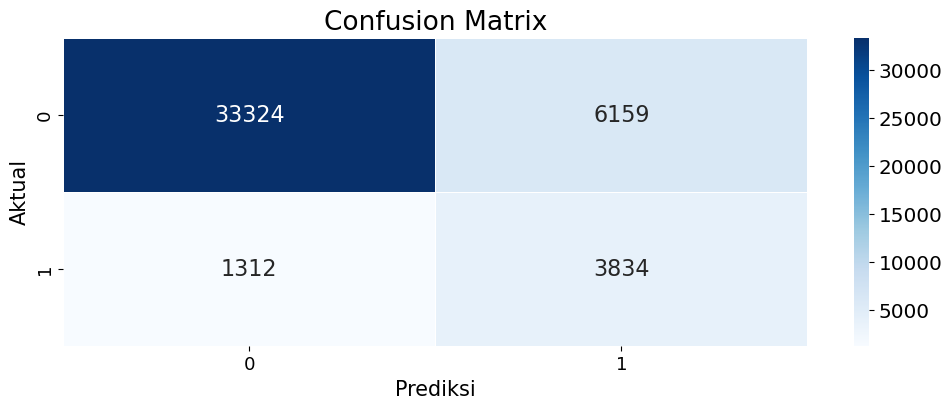

In [84]:
cnf_matrix = confusion_matrix(y, y_pred)
print(classification_report(y, y_pred))
sns.heatmap(cnf_matrix,cmap='Blues',annot=True,linewidth=0.5,fmt='d',annot_kws={"size": 16})
plt.title('Confusion Matrix', fontsize=19)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Prediksi',fontsize=15)
plt.ylabel('Aktual', fontsize=15)
plt.show()

In [85]:
cm_df = pd.DataFrame(cnf_matrix)

In [90]:
approached_cust = cm_df[1][0]+cm_df[1][1]
approached_cust

9993

In [87]:
conversion_rate = round(cm_df[1][1]/(cm_df[1][0]+cm_df[1][1]) * 100,2)
conversion_rate

38.37

In [88]:
avg_cost_per_call = 7.7 #EUR
campaign_cost = cm_df[1].sum() * avg_cost_per_call
campaign_cost

76946.1

In [202]:
income_from_all = 77.5*cm_df[1][1]
income_from_all

329297.5

In [203]:
income_from_all-campaign_cost

230868.4

In [89]:
roi = (income_from_all-campaign_cost) / campaign_cost * 100
roi

432.707310701907

## catatan
- akurasi, presisi dan recall tinggi namun overfiting atau semuanya standar tidak overfiting

- pada saat pengetesan menggunakan data predict jika presesion cukup tinggi 83% namun presision dan recal kurang baik bagaiaman padahal saat di tes menggunakan data split hasil bagus